### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") 

#### Data Collection:

In [2]:
data = pd.read_csv("census.csv")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
data.shape

(32560, 15)

In [5]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Documentation:
    
I can see that the data has "int" and "object" datatypes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Documentation:
    
I can see that here 'no nullvalues' are present in the dataset.

In [7]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.isnull().values.any()

False

Documentation:
    
Now, I can clearly say that the dataset has no null values.

### Statistical Information of the data:

In [10]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Documentation:
    
I can see that only few columns which have appeared with the statistical information this is because all these are numerical columns and the rest which are not appeared are the non-numerical columns.

#### Lets check the information about the categorical data:

In [11]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
data.value_counts(['Workclass'])

Workclass        
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [13]:
data.value_counts(['Education'])

Education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [14]:
data.value_counts(['Marital_status'])

Marital_status        
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [15]:
data.value_counts(['Occupation'])

Occupation        
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [16]:
data.value_counts(['Relationship'])

Relationship   
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [17]:
data.value_counts(['Race'])

Race               
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [18]:
data.value_counts(['Sex'])

Sex    
 Male      21789
 Female    10771
dtype: int64

In [19]:
data.value_counts(['Native_country'])

Native_country             
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru     

In [20]:
data.value_counts(['Income'])

Income
 <=50K    24719
 >50K      7841
dtype: int64

### Using For-loop to find the unique values in all the columns:

In [21]:
for i in data.columns:
    print (i,':',len(data[i].unique()))

Age : 73
Workclass : 9
Fnlwgt : 21647
Education : 16
Education_num : 16
Marital_status : 7
Occupation : 15
Relationship : 6
Race : 5
Sex : 2
Capital_gain : 119
Capital_loss : 92
Hours_per_week : 94
Native_country : 42
Income : 2


Documentation:
    
I can see that the columns have few unique data and the rest records are with these repeated values, so this states that our data has duplicates.

Dropping the duplicates:

In [22]:
data=data.drop_duplicates()

In [23]:
data.shape

(32536, 15)

In [24]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### Checking whether we have any other residual data in column's apart from "Nan" :

In [25]:
# Randomly I checked it for # Workclass
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Documentation:
    
I can see that I am having "?" inside the column, and it is of no use in the prediction and here is the change that other columns may also have this data and so we will drop this data from the entire data set.

#### Now we will replace the data "?" with "nan" and then we will drop:

In [26]:
data[data == ' ?'] = np.nan

In [27]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Documentation:
    
Now, I can see that our data is replace with 'NaN' instead of "?" and now I will drop all the 'NaN' value

In [28]:
data= data.dropna()

In [29]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Documentation:
    
I can see that I have dropped all the unrequired data.

In [30]:
data.shape

(30138, 15)

#### Checking the null values by plotting the heatmap:

<AxesSubplot:>

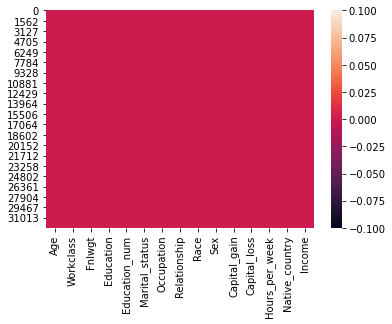

In [31]:
sns.heatmap(data.isnull())

Documentation:
    
No, 'Null Value' can be seen in our graph.

### Visualization:

#### Univariate Analysis:

##### Age:

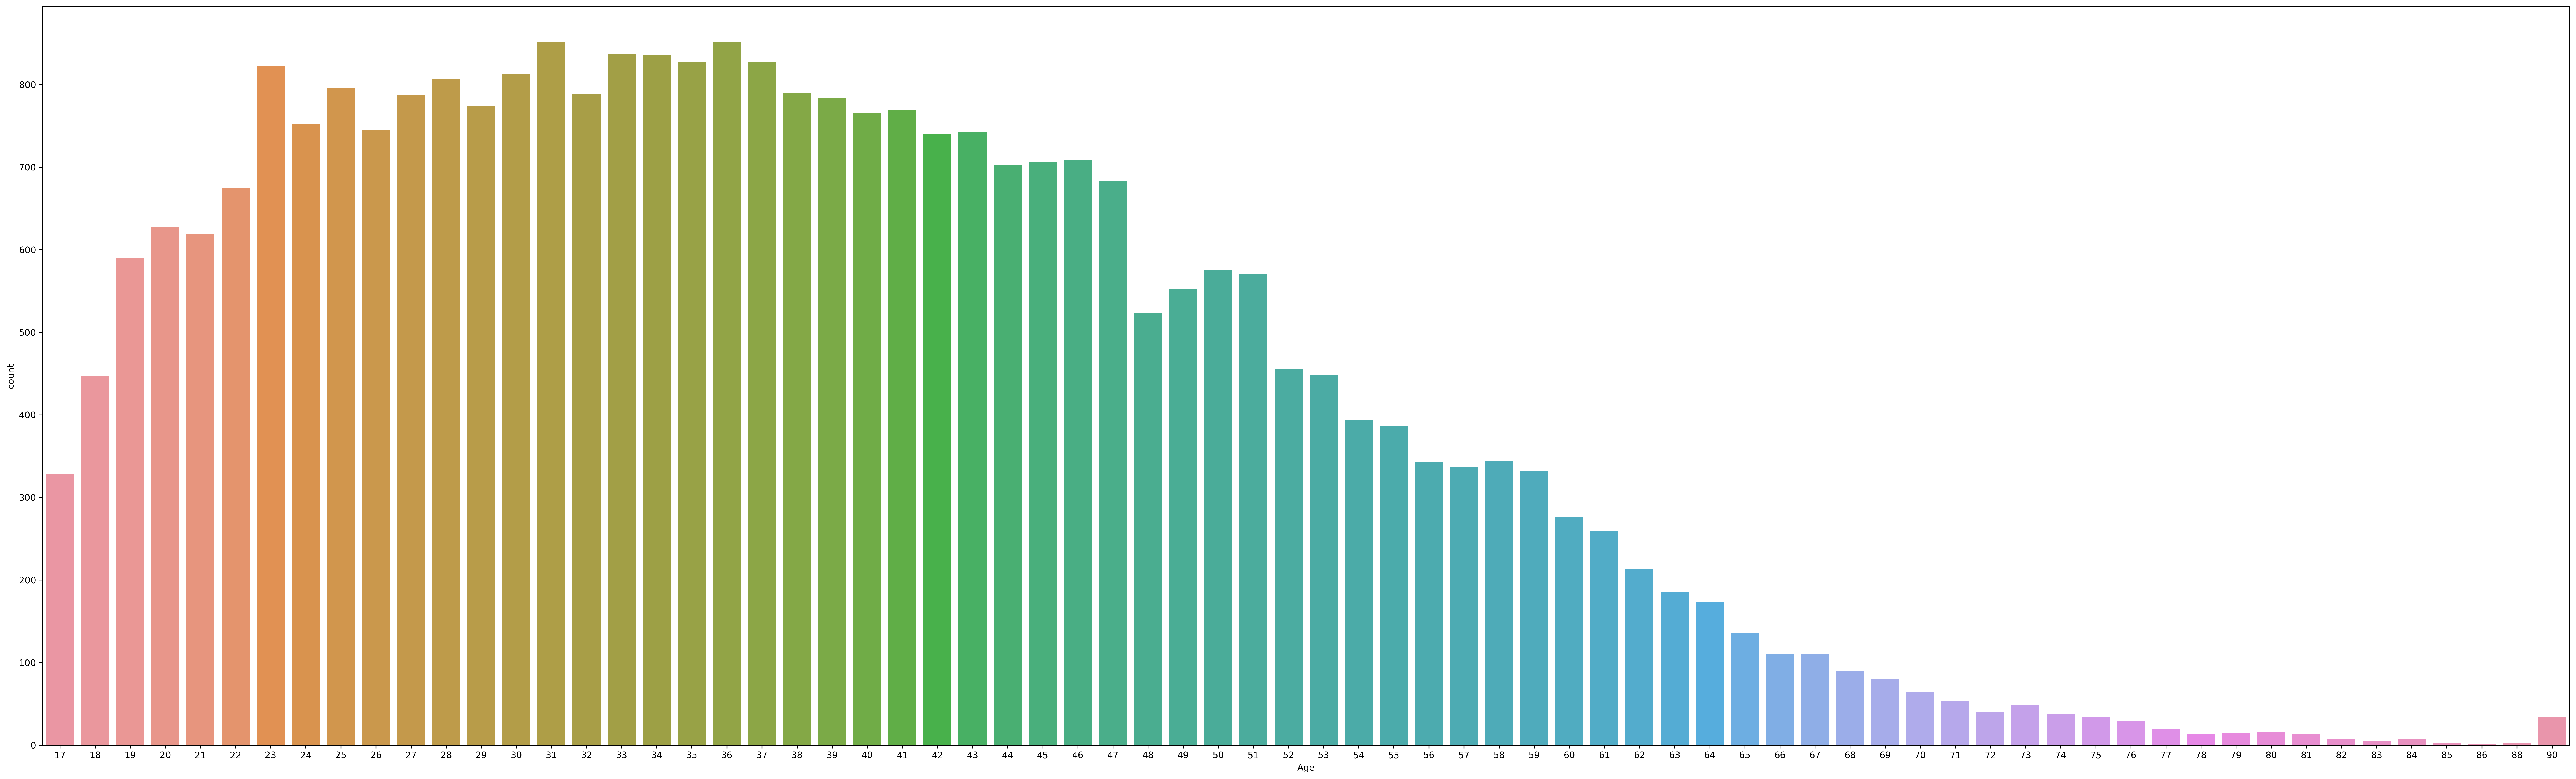

In [32]:
plt.figure(figsize=(50,15),dpi=300)
sns.countplot(data.Age);

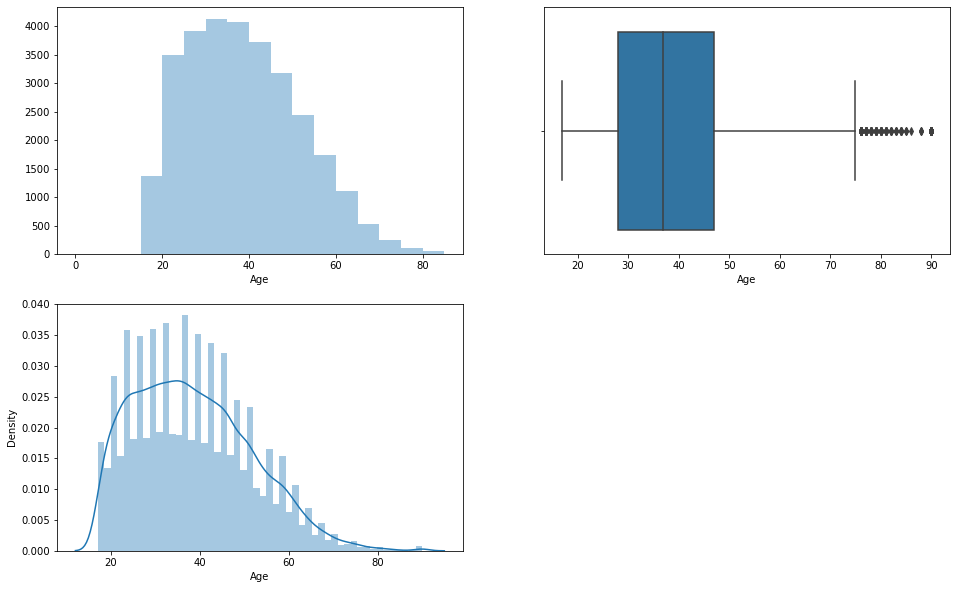

In [33]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['Age'], kde=False, bins=range(0,90,5));
plt.subplot(2,2,2)
sns.boxplot(data['Age']);
plt.subplot(2,2,3)
sns.distplot(data['Age']);

Documentation:
    
I can see that our boxplot has some outliers and the distribution curve is skewed.

##### Workclass:

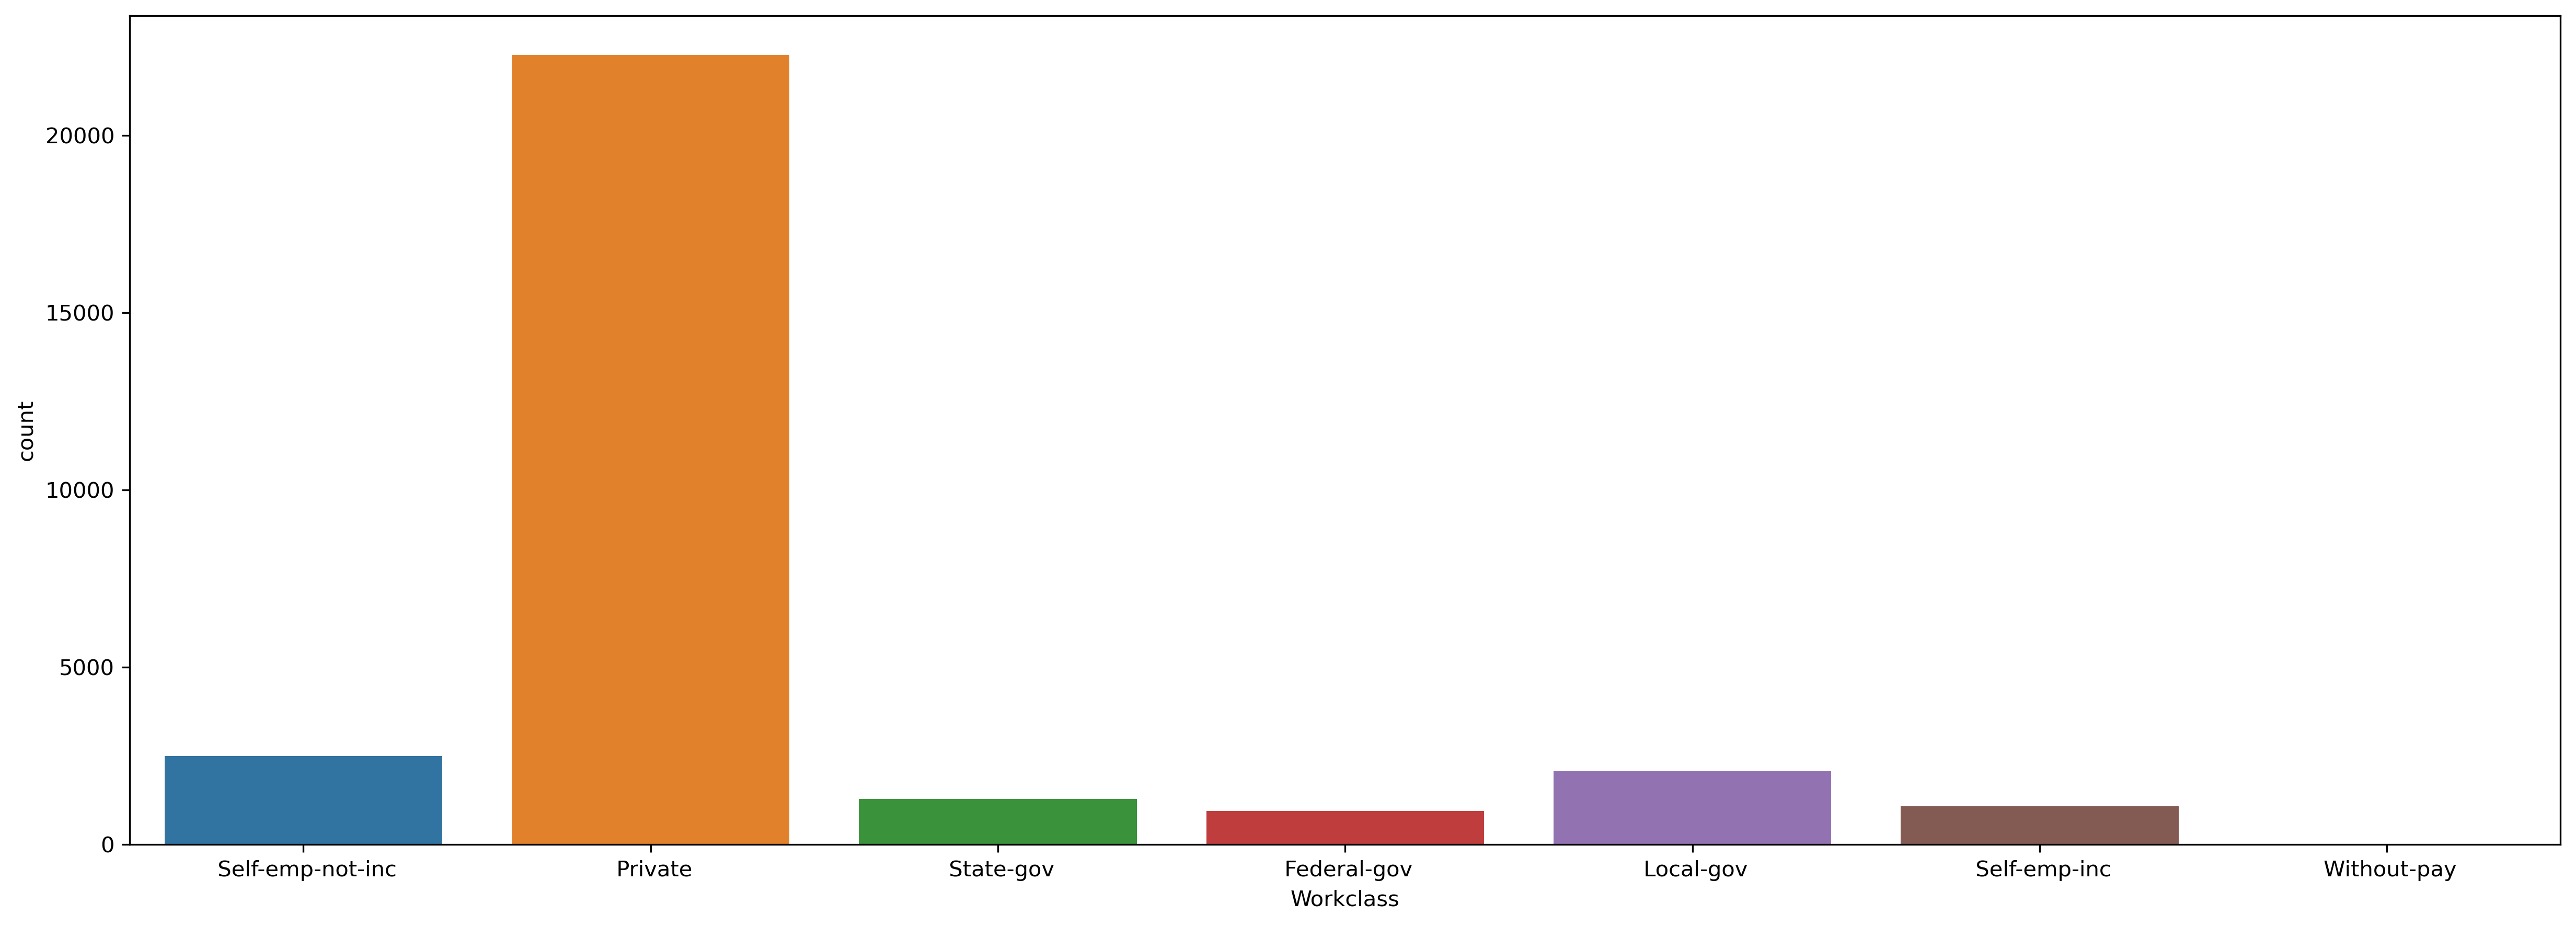

In [34]:
plt.figure(figsize=(20,7),dpi=300)
sns.countplot(data.Workclass);

Documentation:
    
I can see that the count data is more in the "Private". and the lease is in "without pay".

##### Fnlwgt:

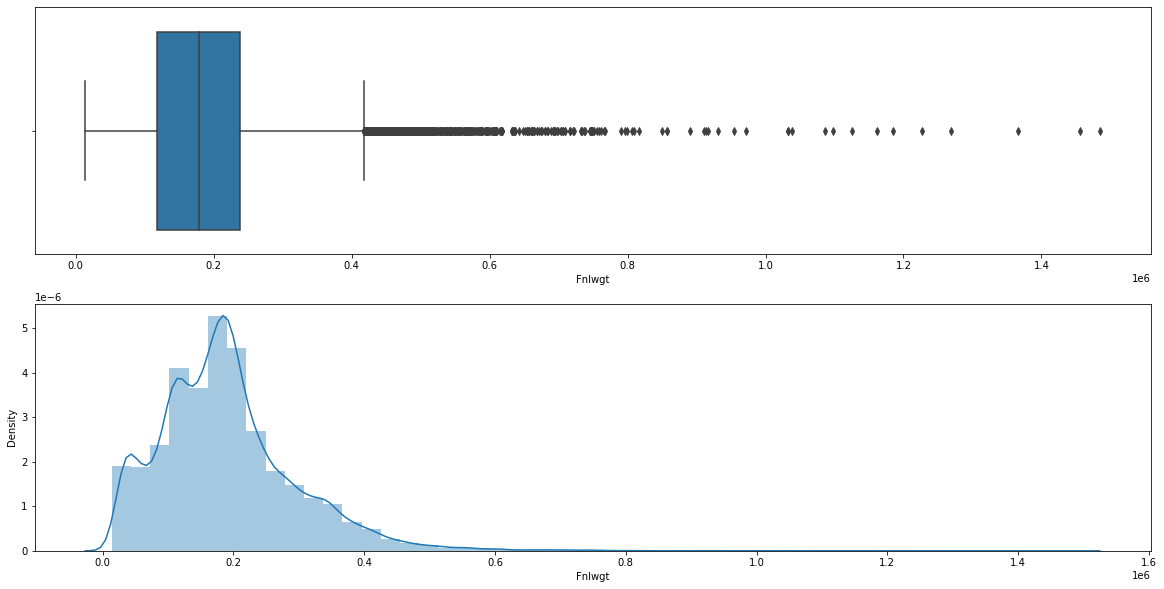

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(data['Fnlwgt']);
plt.subplot(2,1,2)
sns.distplot(data['Fnlwgt']);

Documentation:
    
I can see that there are outliers present in the boxplot and the distribution curve is also not normal.

##### Education:

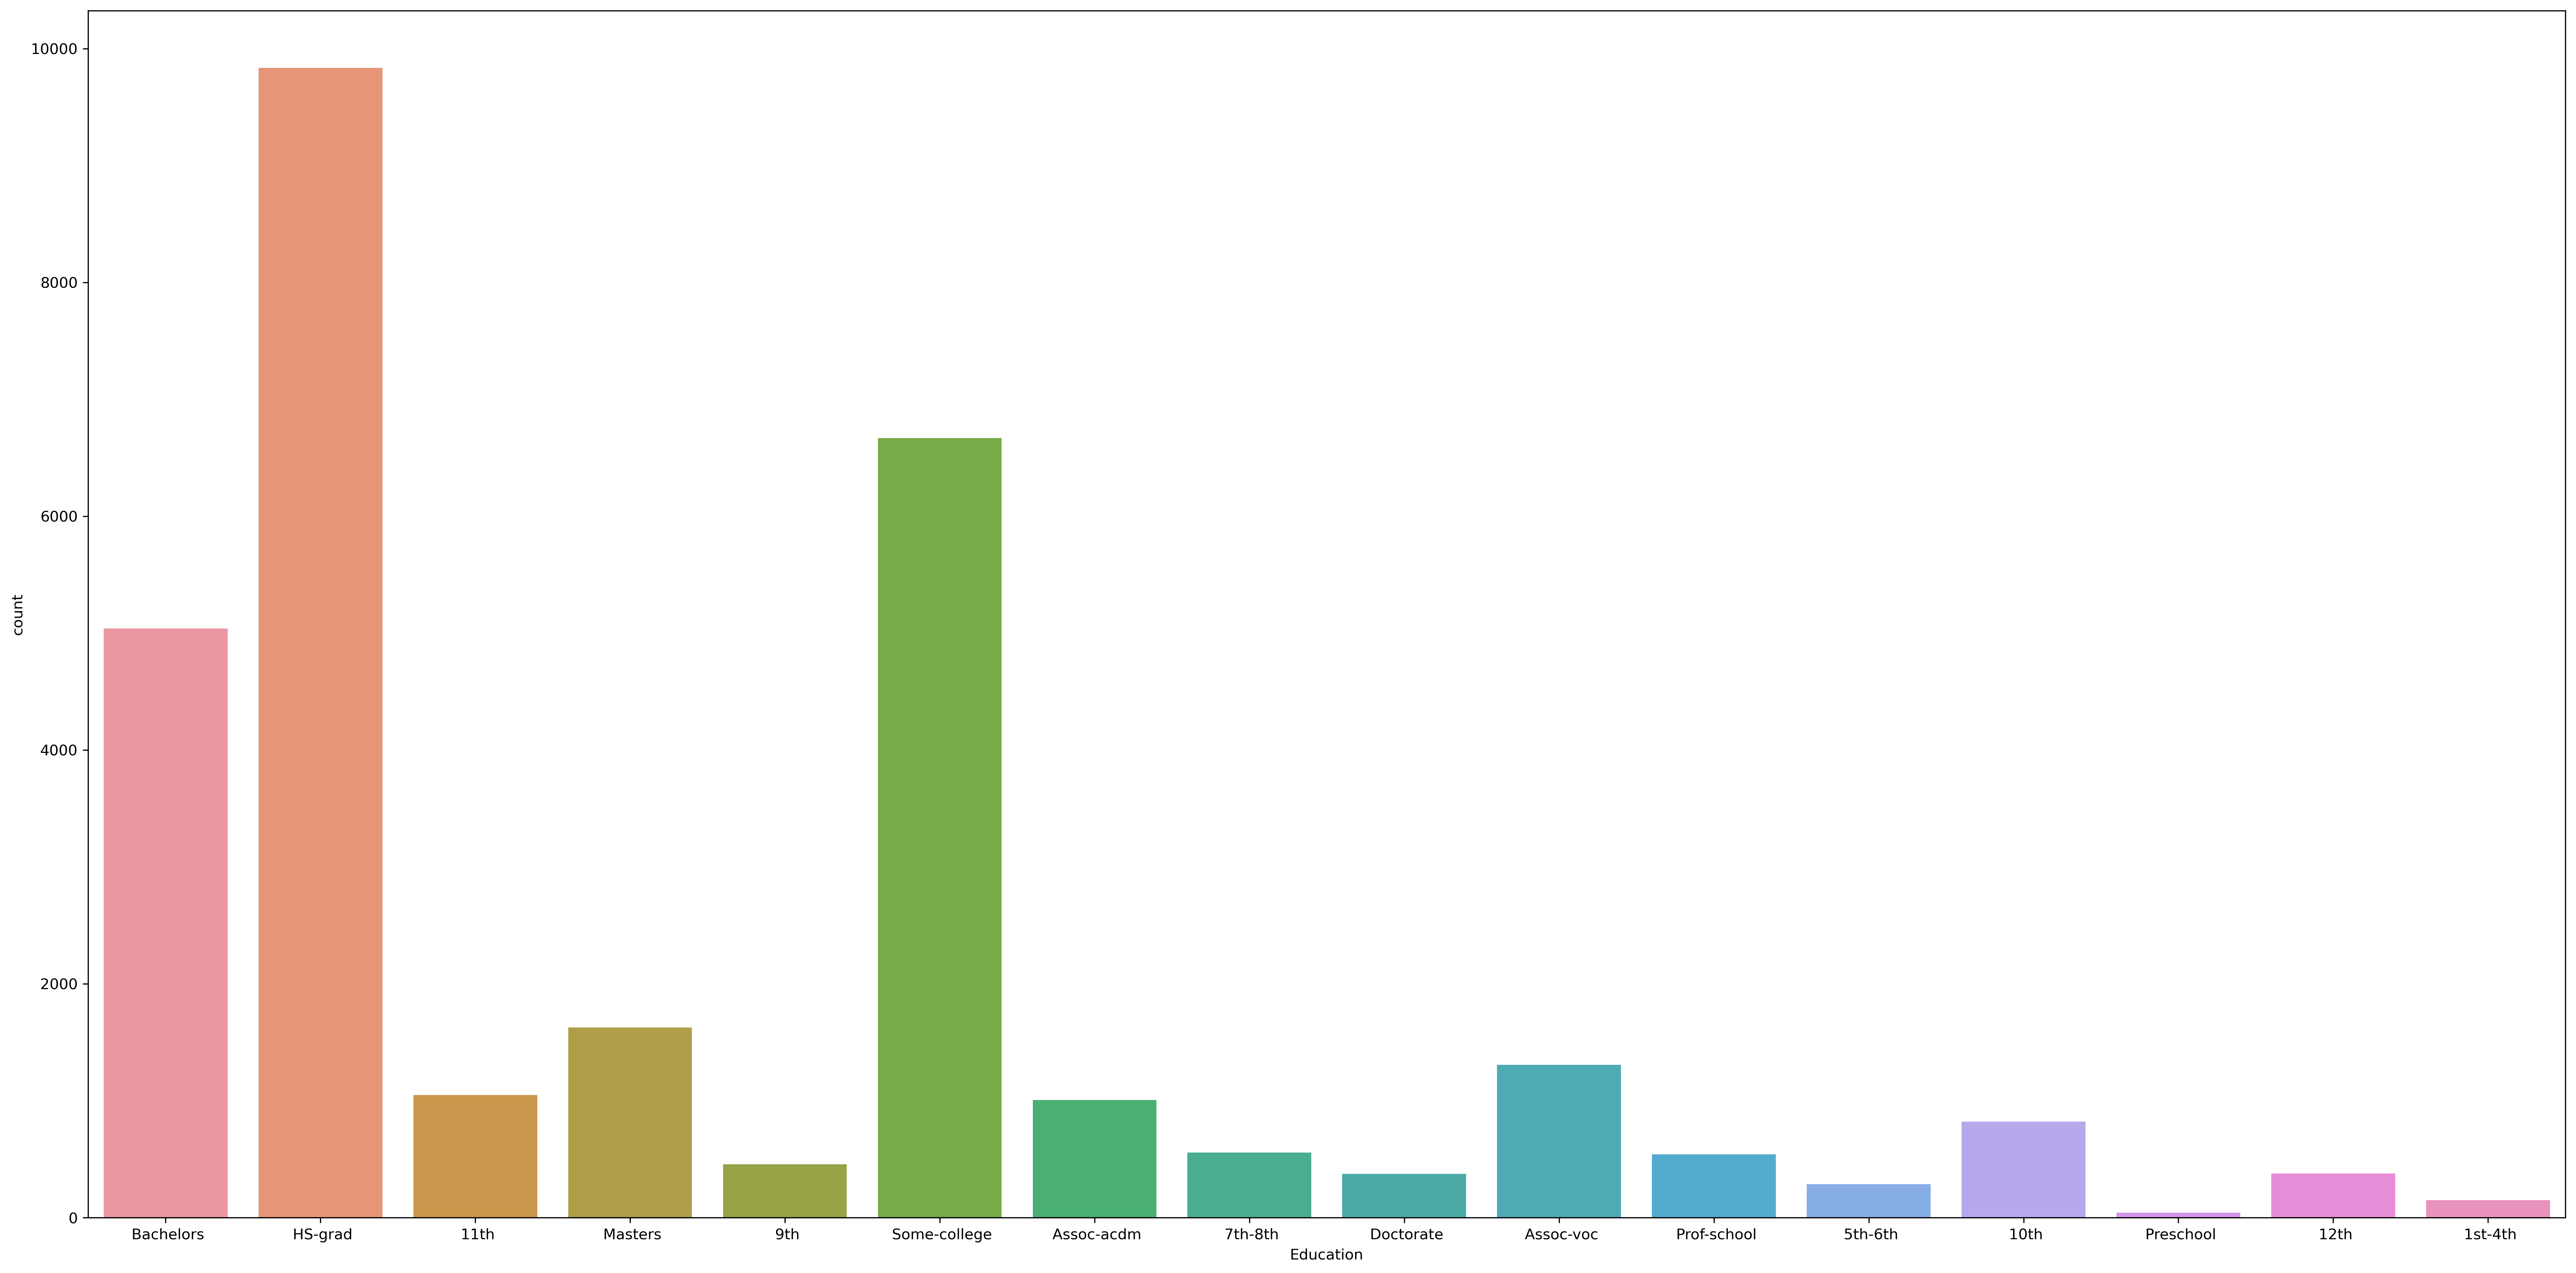

In [36]:
plt.figure(figsize=(30,15),dpi=300)
sns.countplot(data.Education);

Documentation:

I can see that the category 'HS - grad' has the highest data in count and the least count we can see in the category 'Preschool'.

##### Education_num:

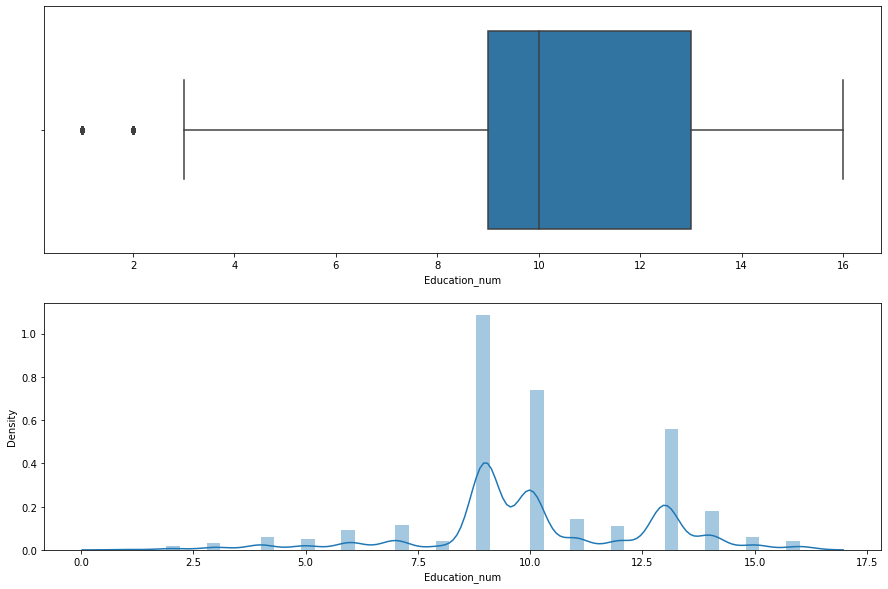

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(data['Education_num']);
plt.subplot(2,1,2)
sns.distplot(data['Education_num']);

Documentation:
    
I can see that the boxplot has the outliers but they are far away from "max -quantile" and probably they will not affect the model and the distribution curve is also not normal.

##### Marital_status:

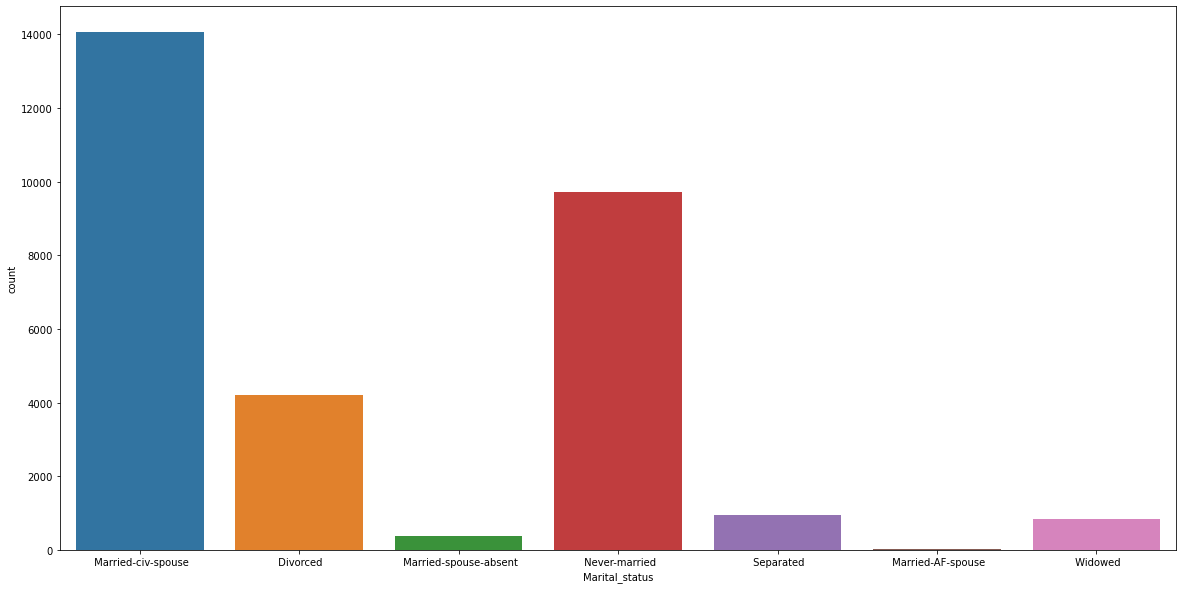

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(data.Marital_status);

Documentation:
    
I can see that the category  'Married civ spouse'  has the heighest count and the least count is for the category 'Married AF spouse' .

##### Occupation:

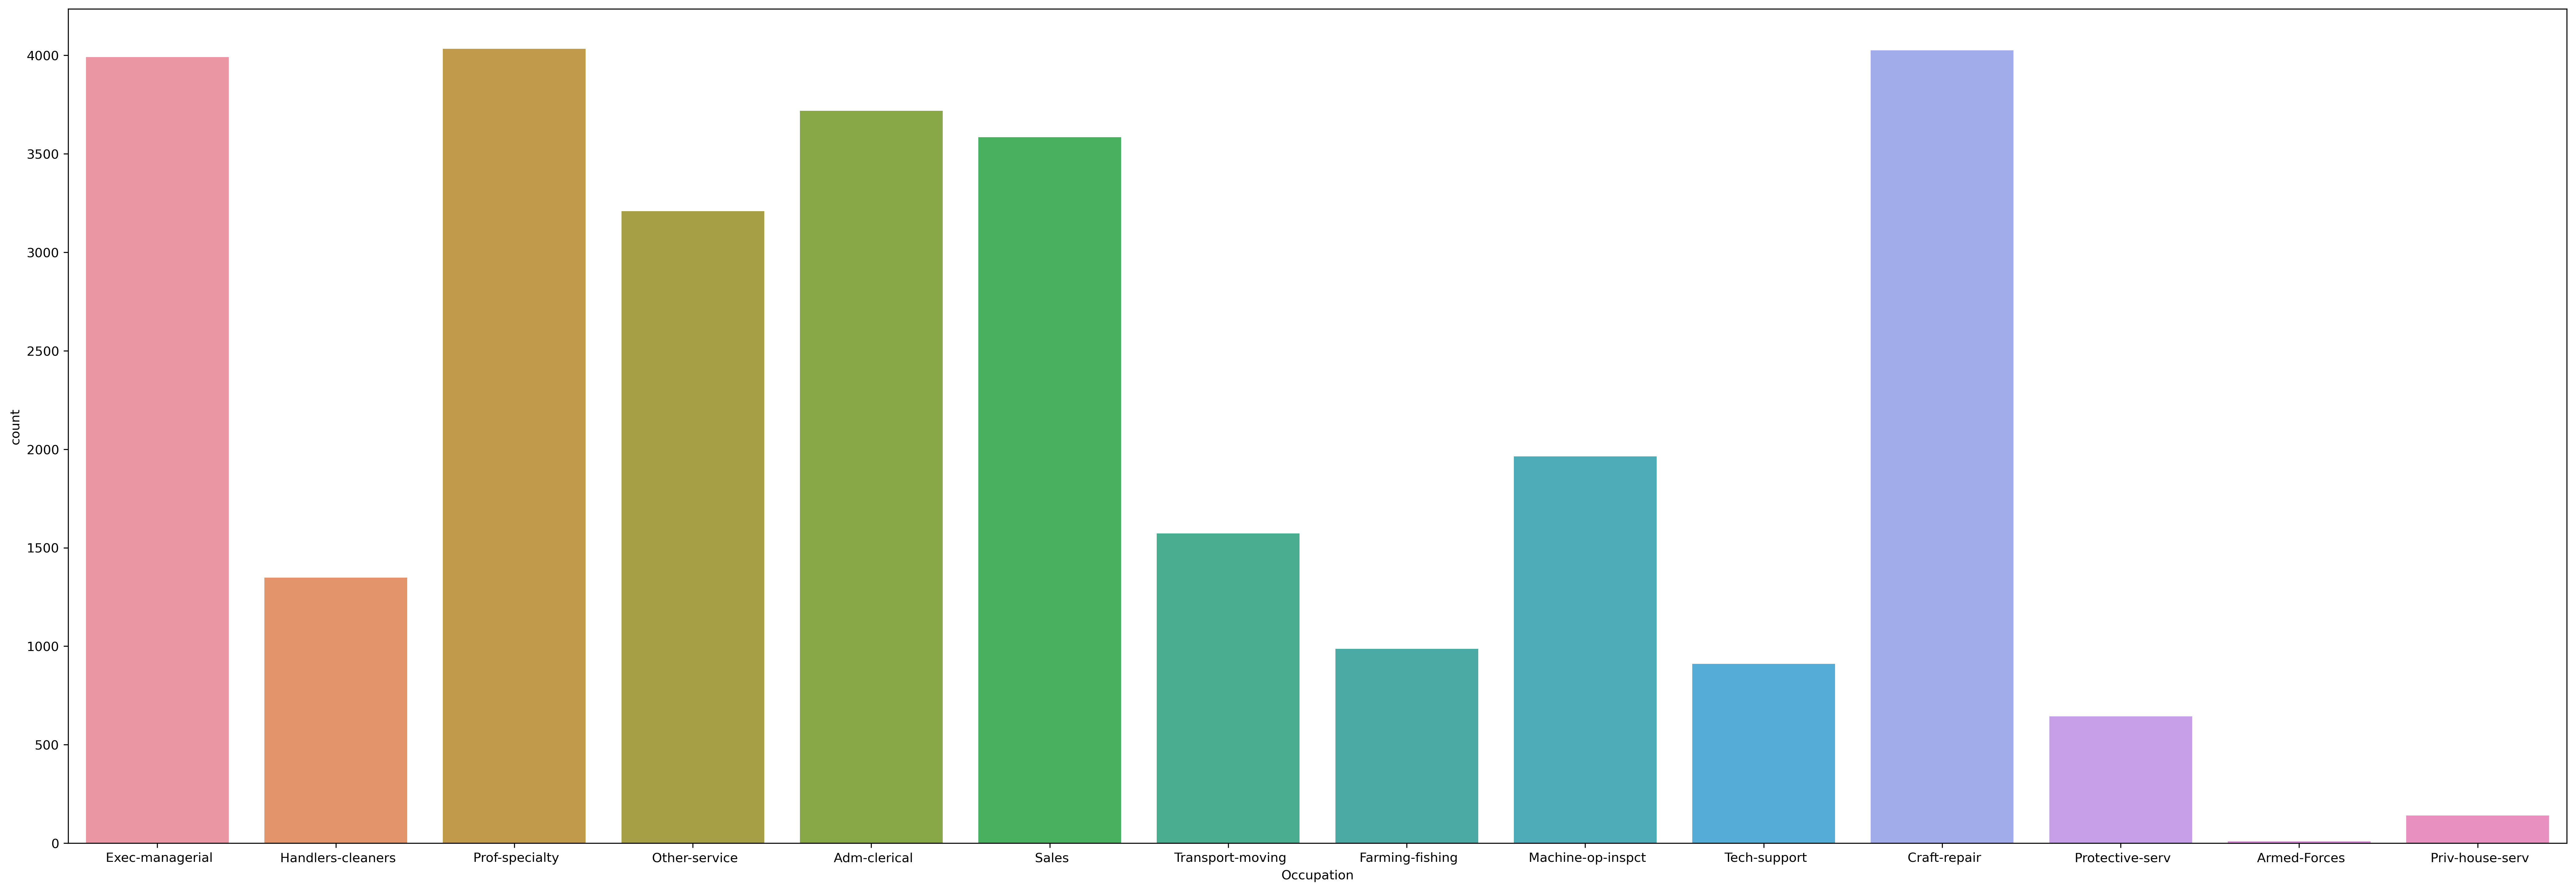

In [39]:
plt.figure(figsize=(35,12),dpi=300)
sns.countplot(data.Occupation);

Documentation:
    
I can see that the categories 'Exec-managerial' , 'prof-speciality' and 'craft-repair' has the highest data count and the least count is for the category "Armed Forces".

#### Relationship:

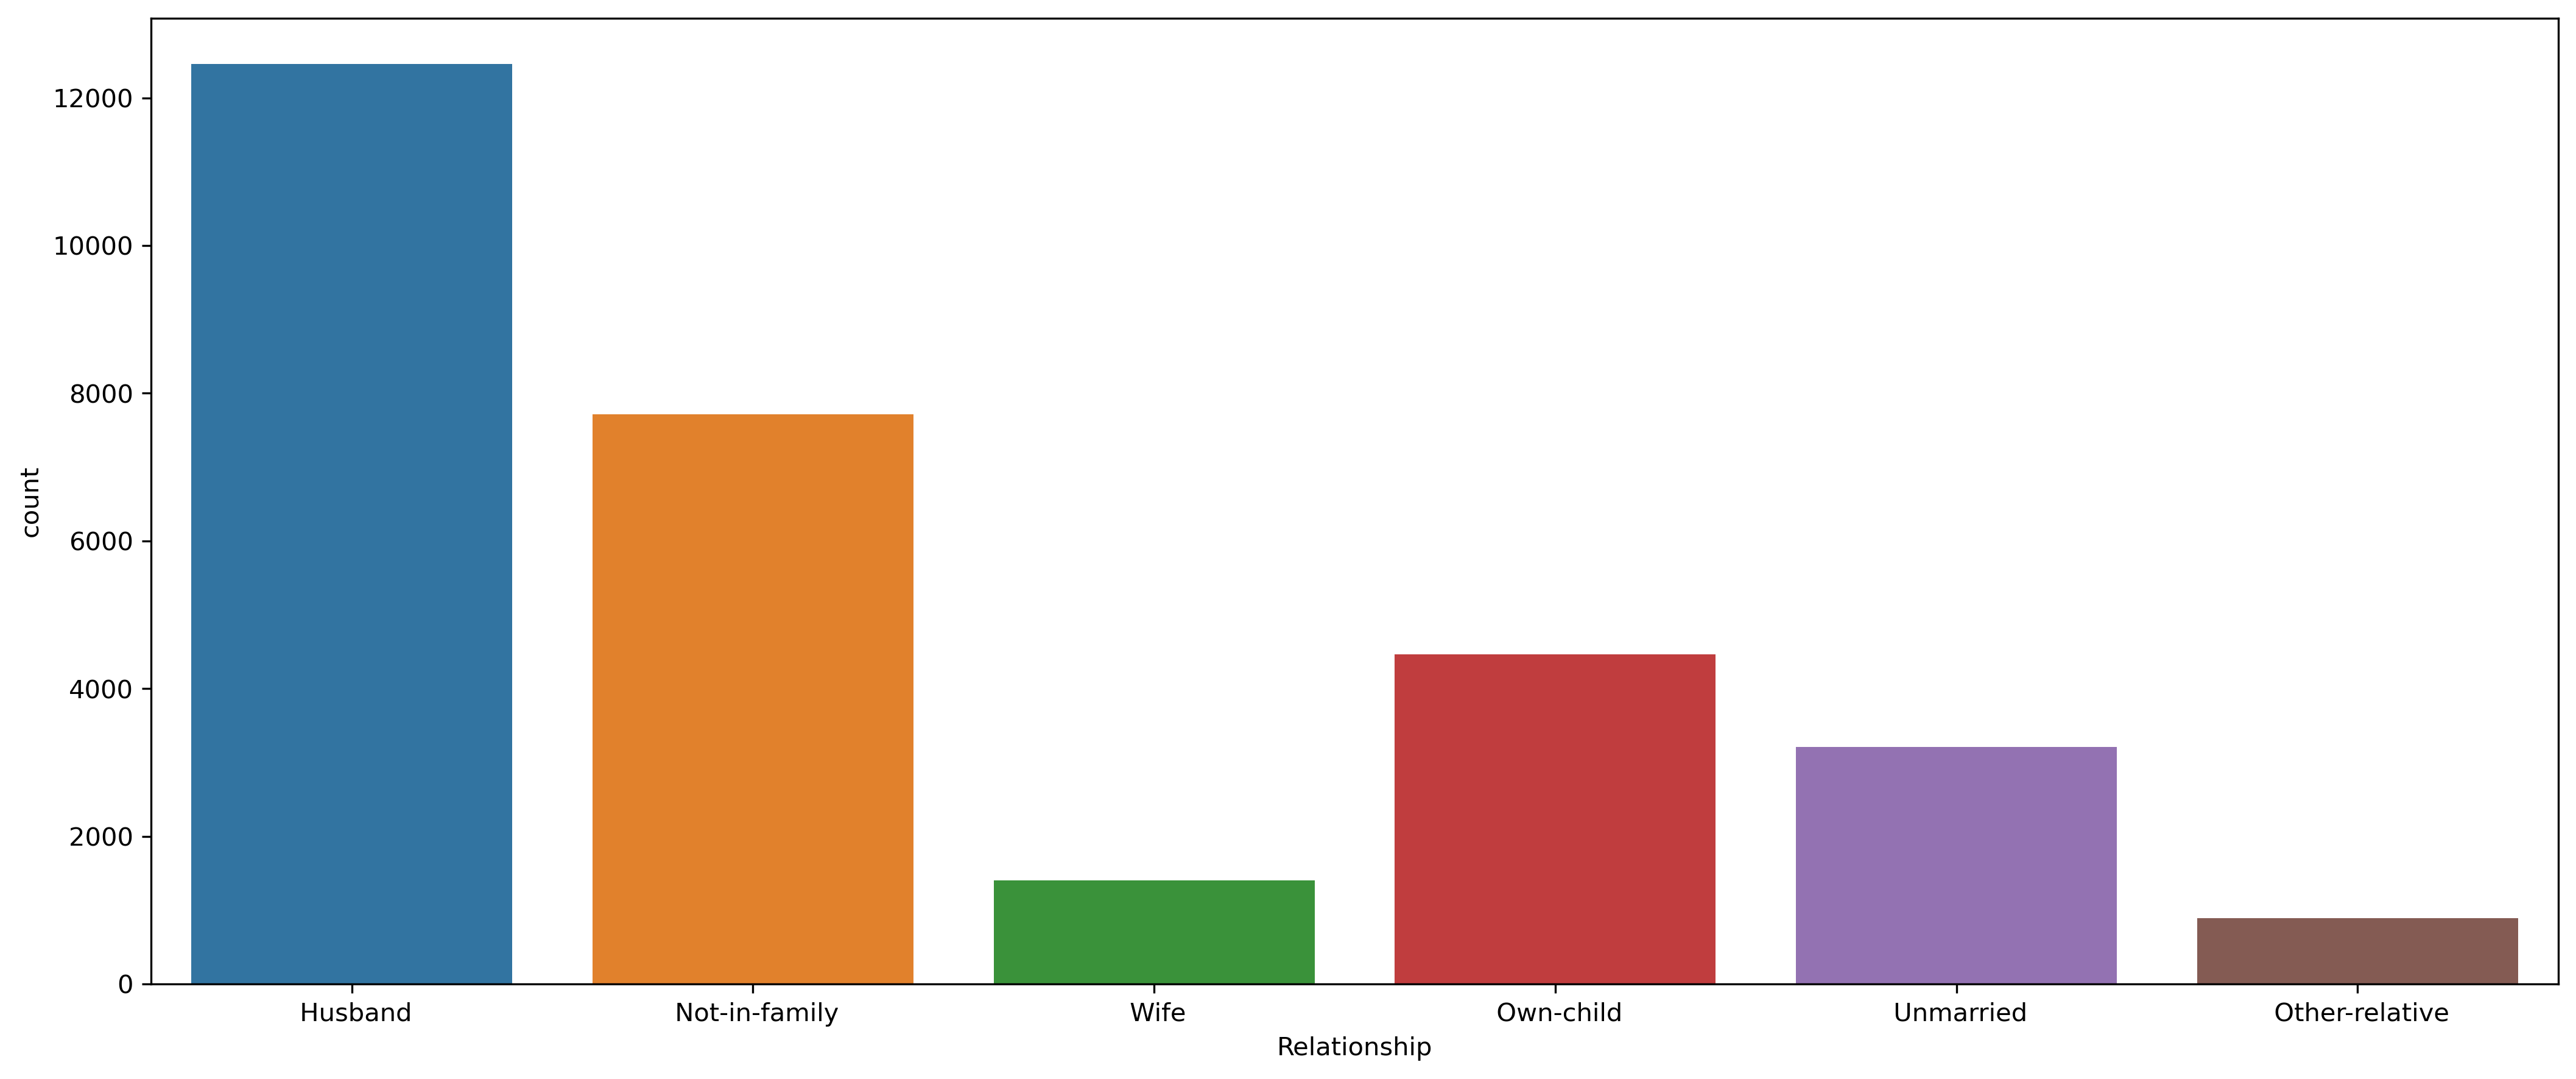

In [40]:
plt.figure(figsize=(17,7), dpi=300)
sns.countplot(data.Relationship);

#### Race:

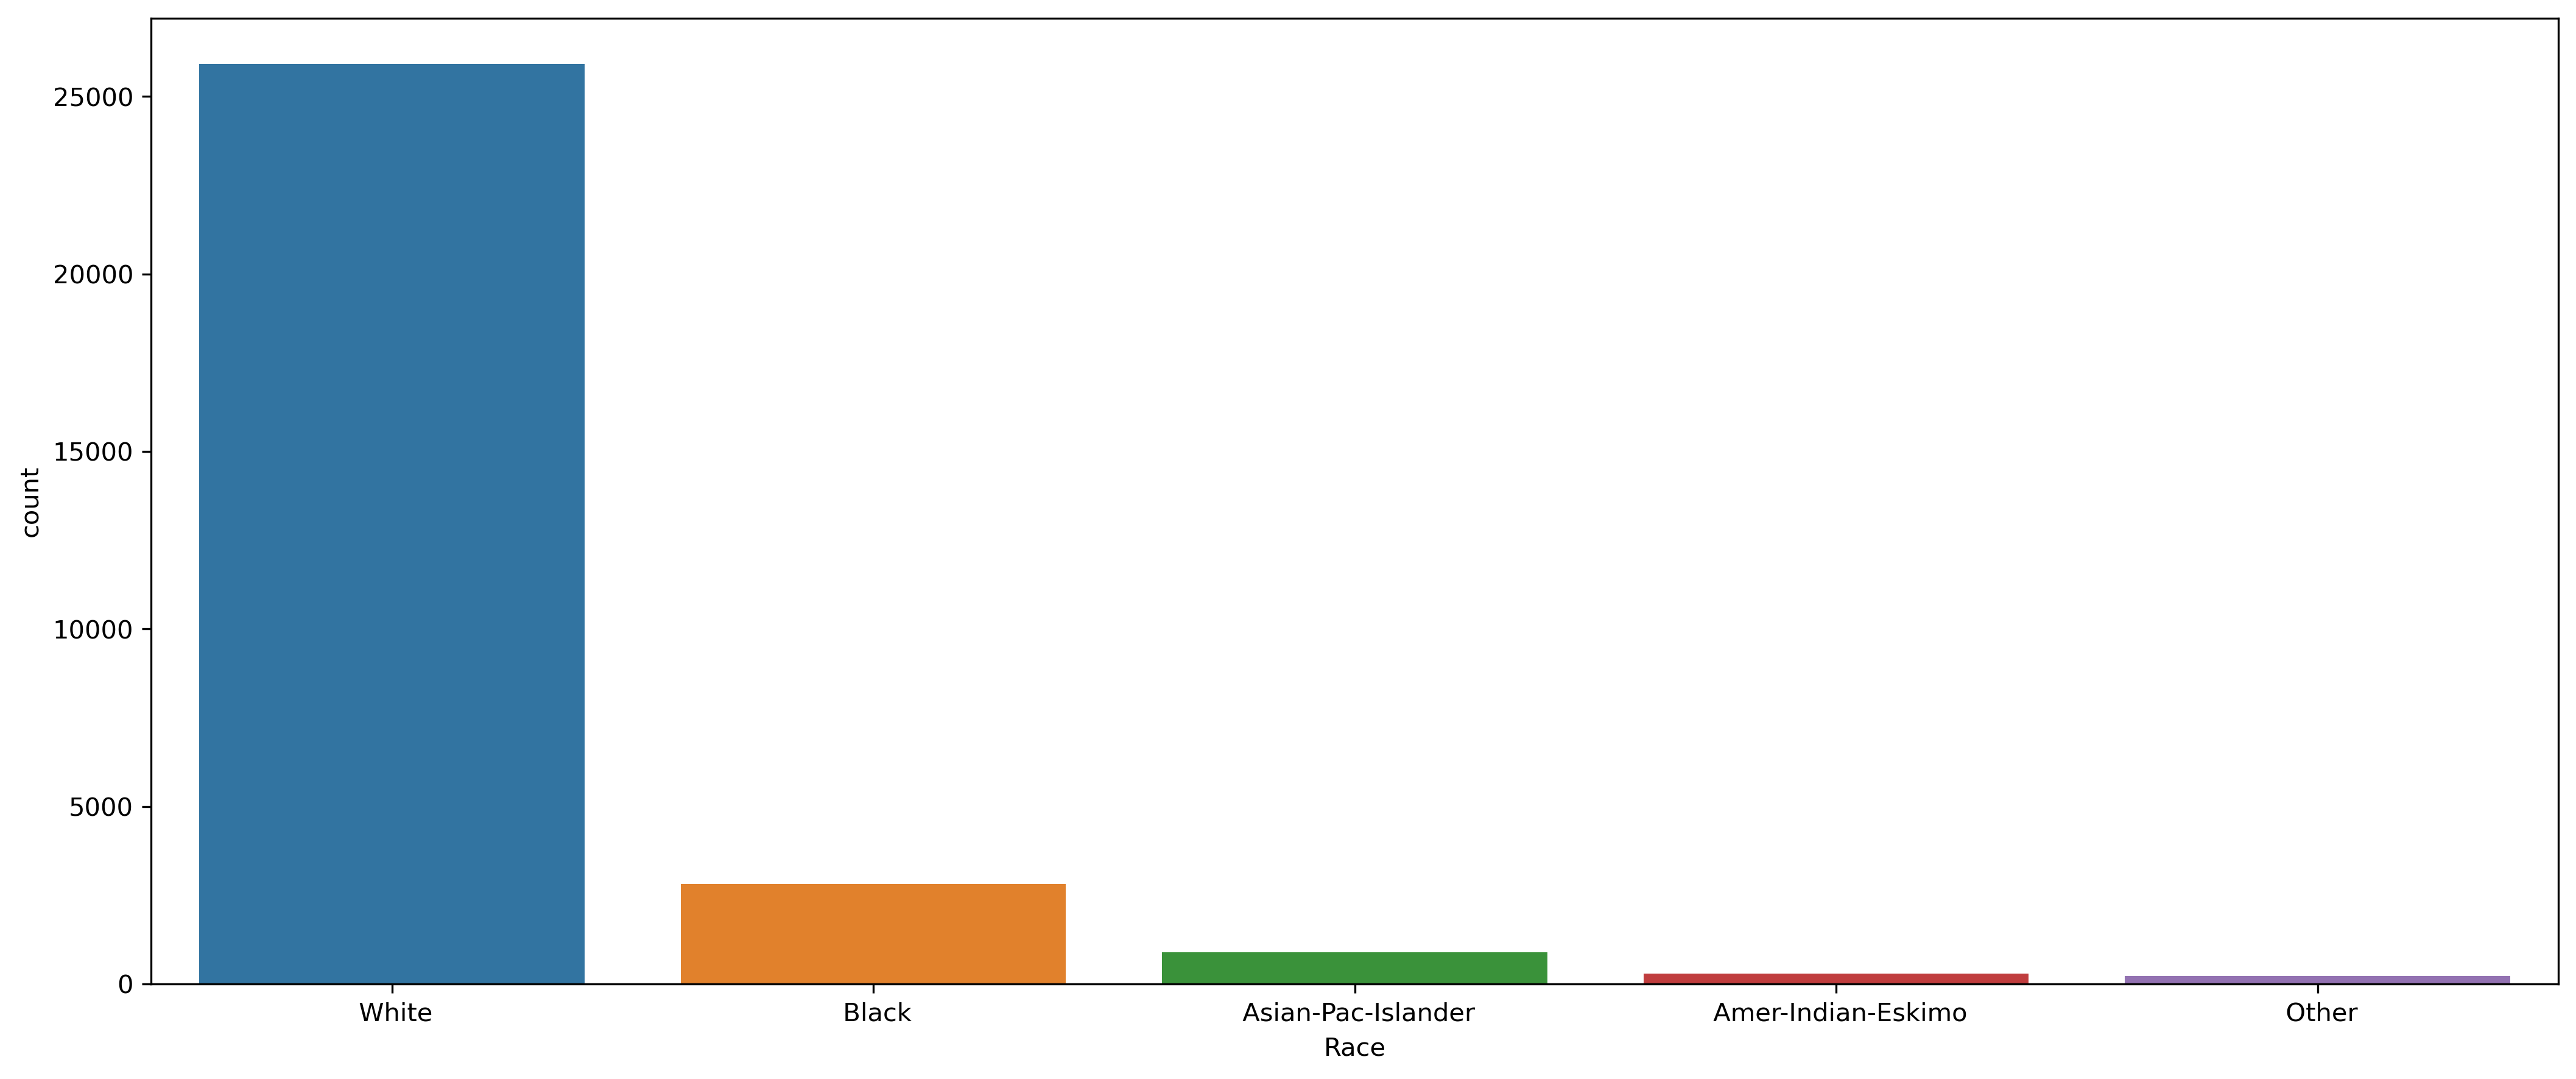

In [41]:
plt.figure(figsize=(17,7),dpi=300)
sns.countplot(data.Race);

Documentation:
    
I can see that the highest count is for the category "White" and the least count is for the category "Other".

#### Sex:

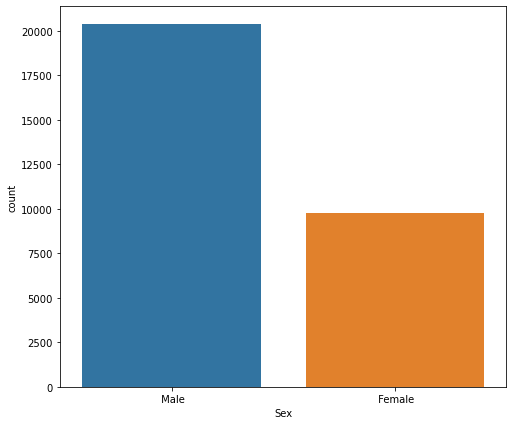

In [42]:
plt.figure(figsize=(8,7))
sns.countplot(data.Sex);

Documentation:
    
I can see that the category 'Male' has more count when compared with 'Female'

#### Capital_gain:

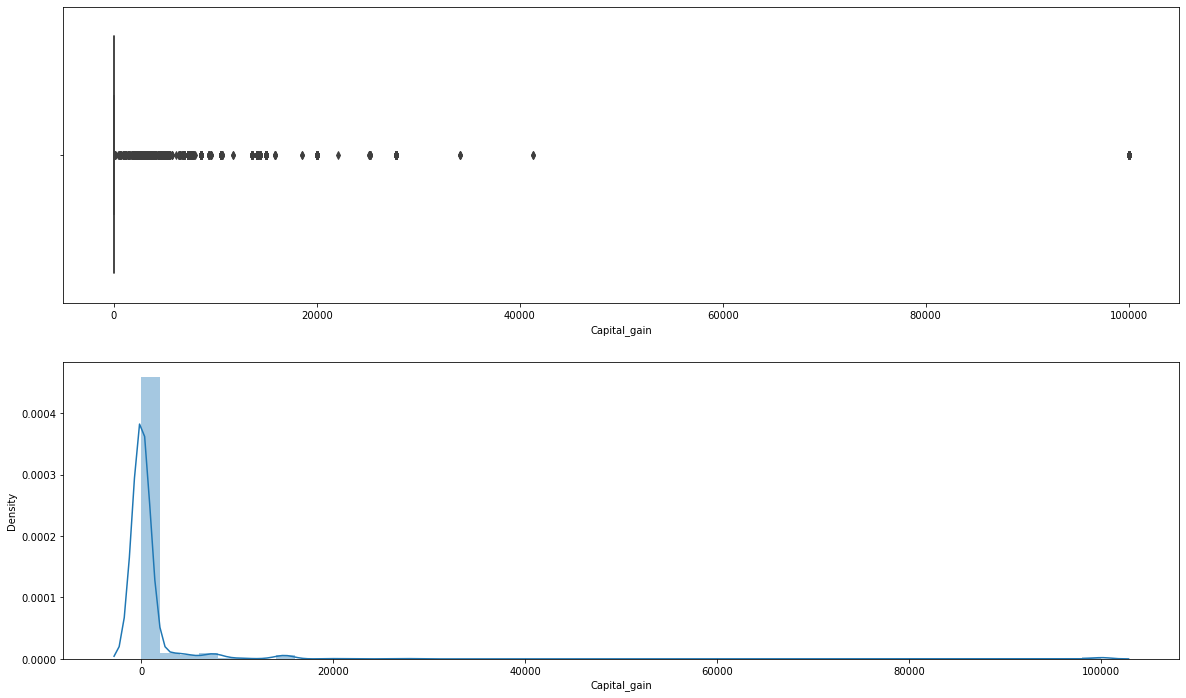

In [43]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.boxplot(data['Capital_gain']);
plt.subplot(2,1,2)
sns.distplot(data['Capital_gain']);

Documentation:
    
I can see that boxplot has outliers and the distribution curve is not normal.

##### Capital_loss:

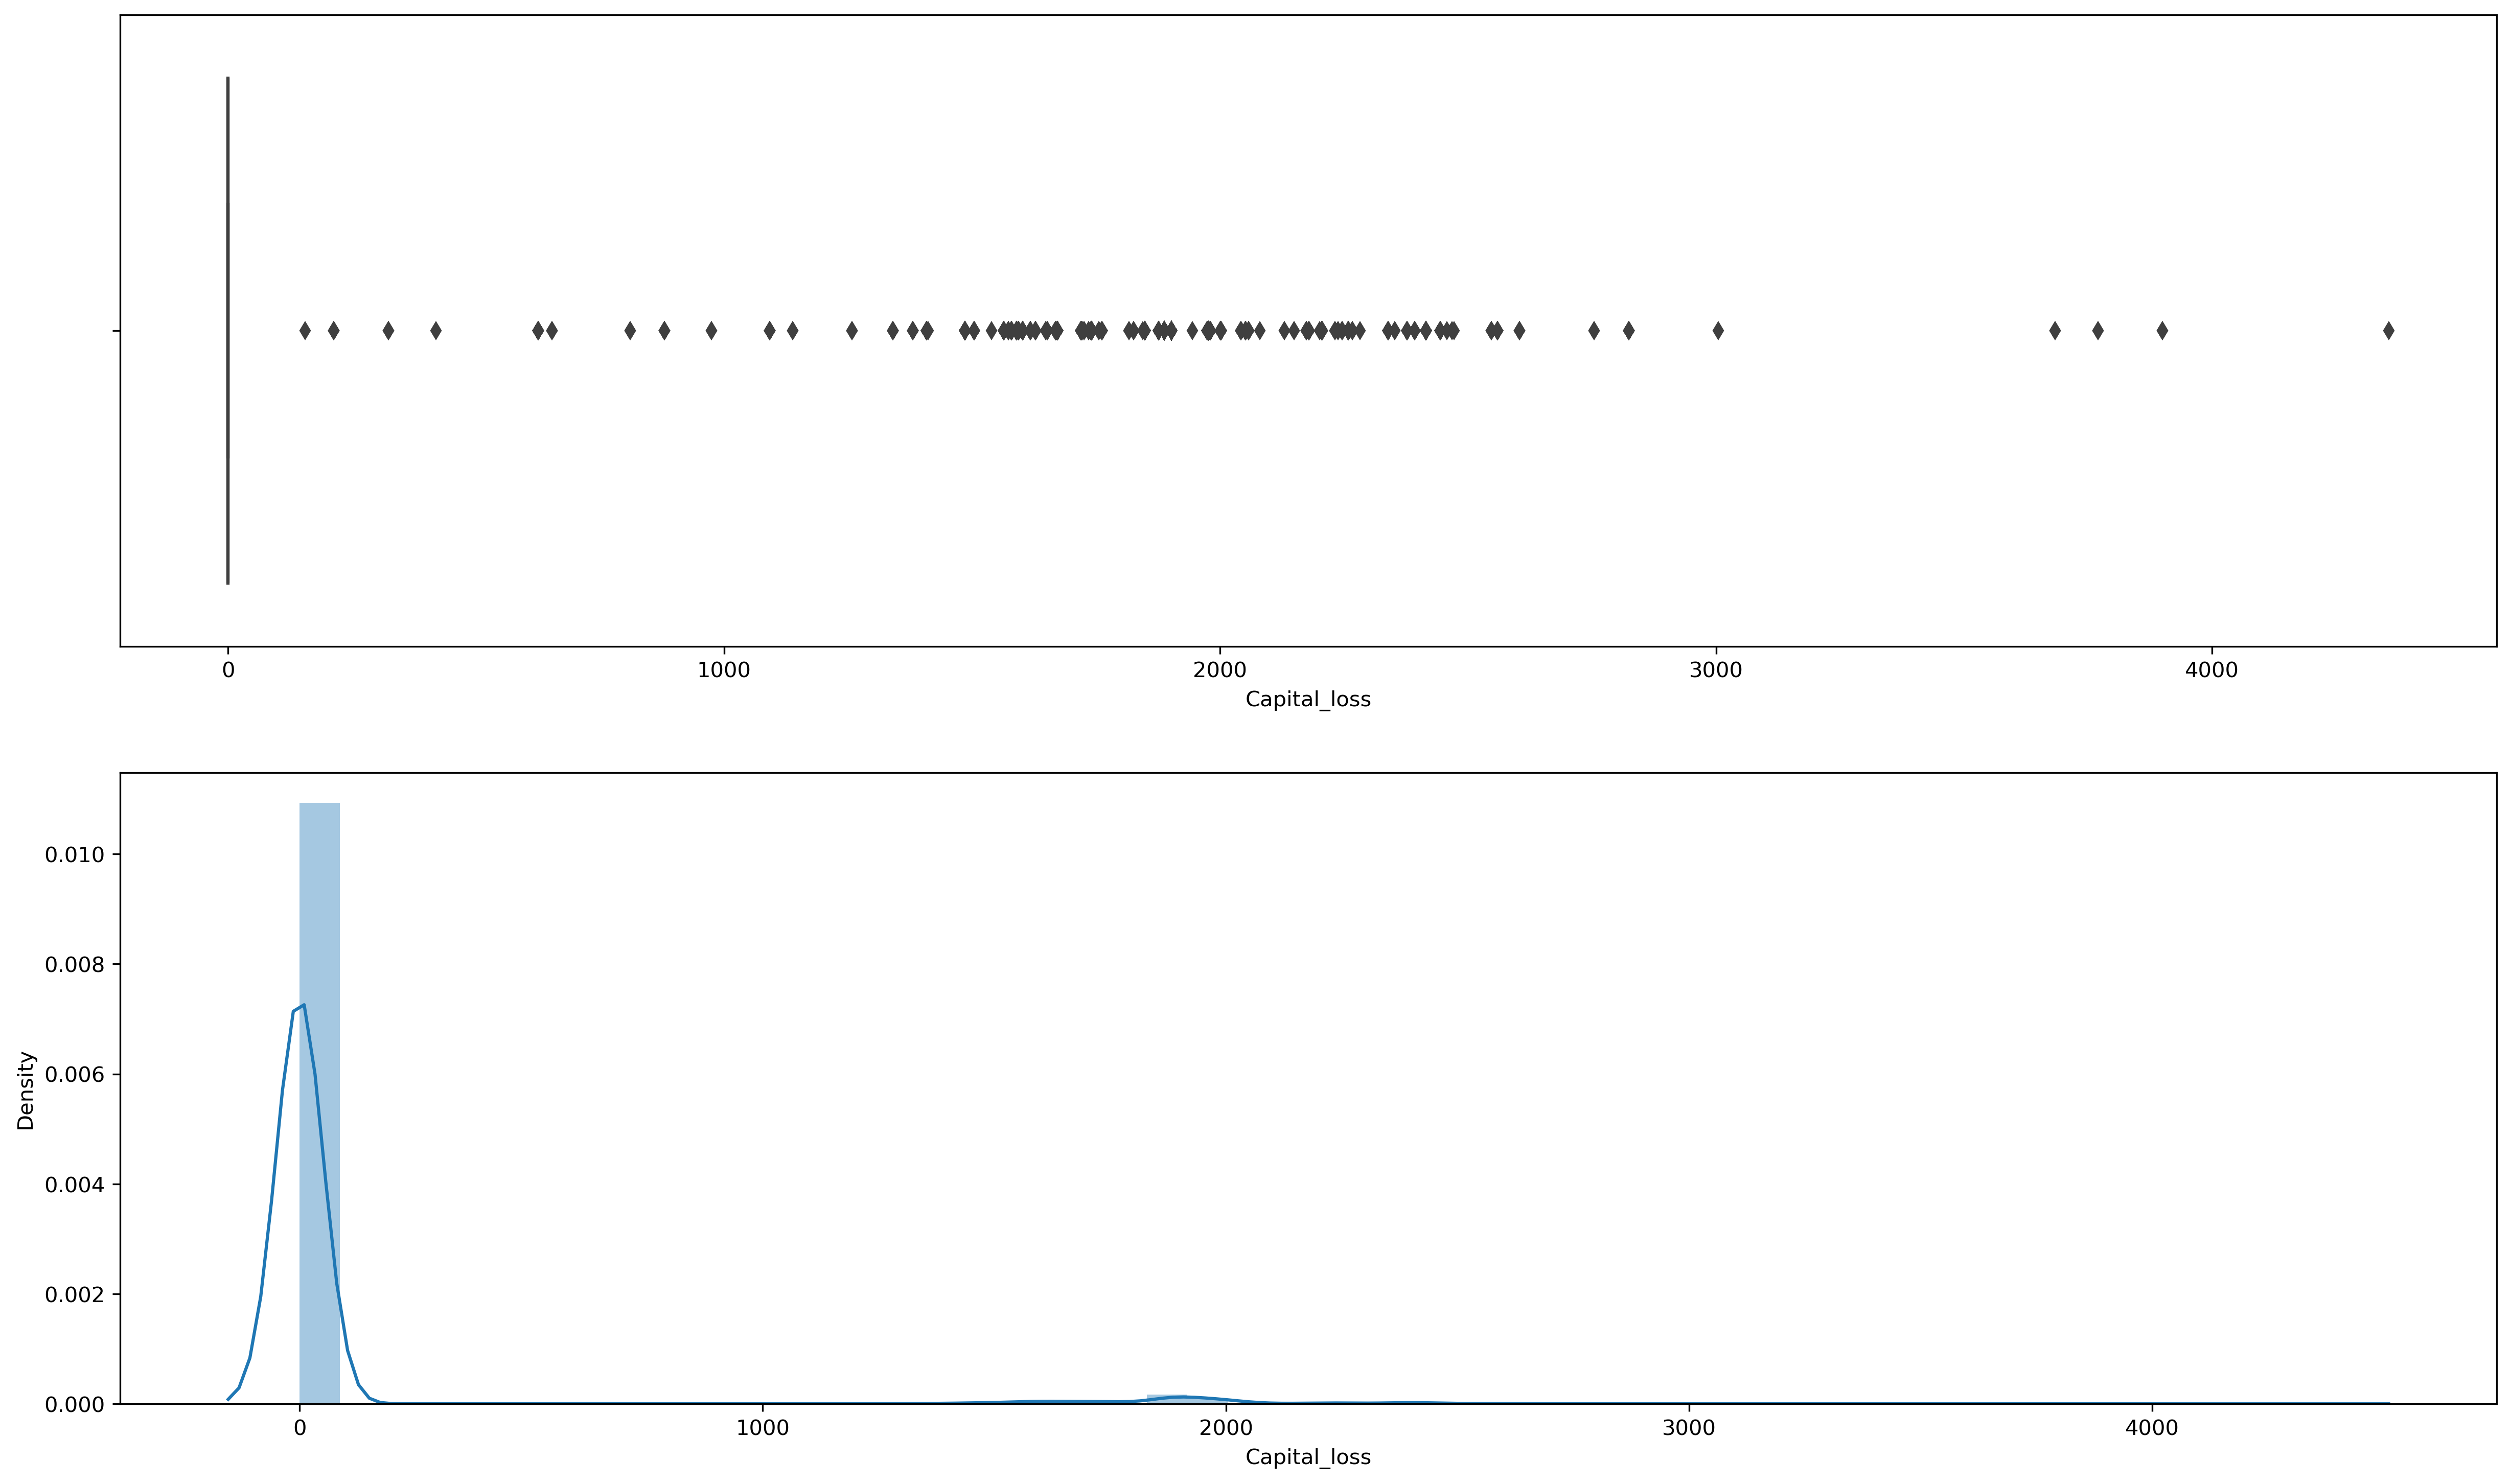

In [44]:
plt.figure(figsize=(20,12),dpi=300)
plt.subplot(2,1,1)
sns.boxplot(data['Capital_loss']);
plt.subplot(2,1,2)
sns.distplot(data['Capital_loss']);

Documentation:
    
I can see that the boxplot has many outliers and the distribution curve is not normal.

##### Hours_per_week:

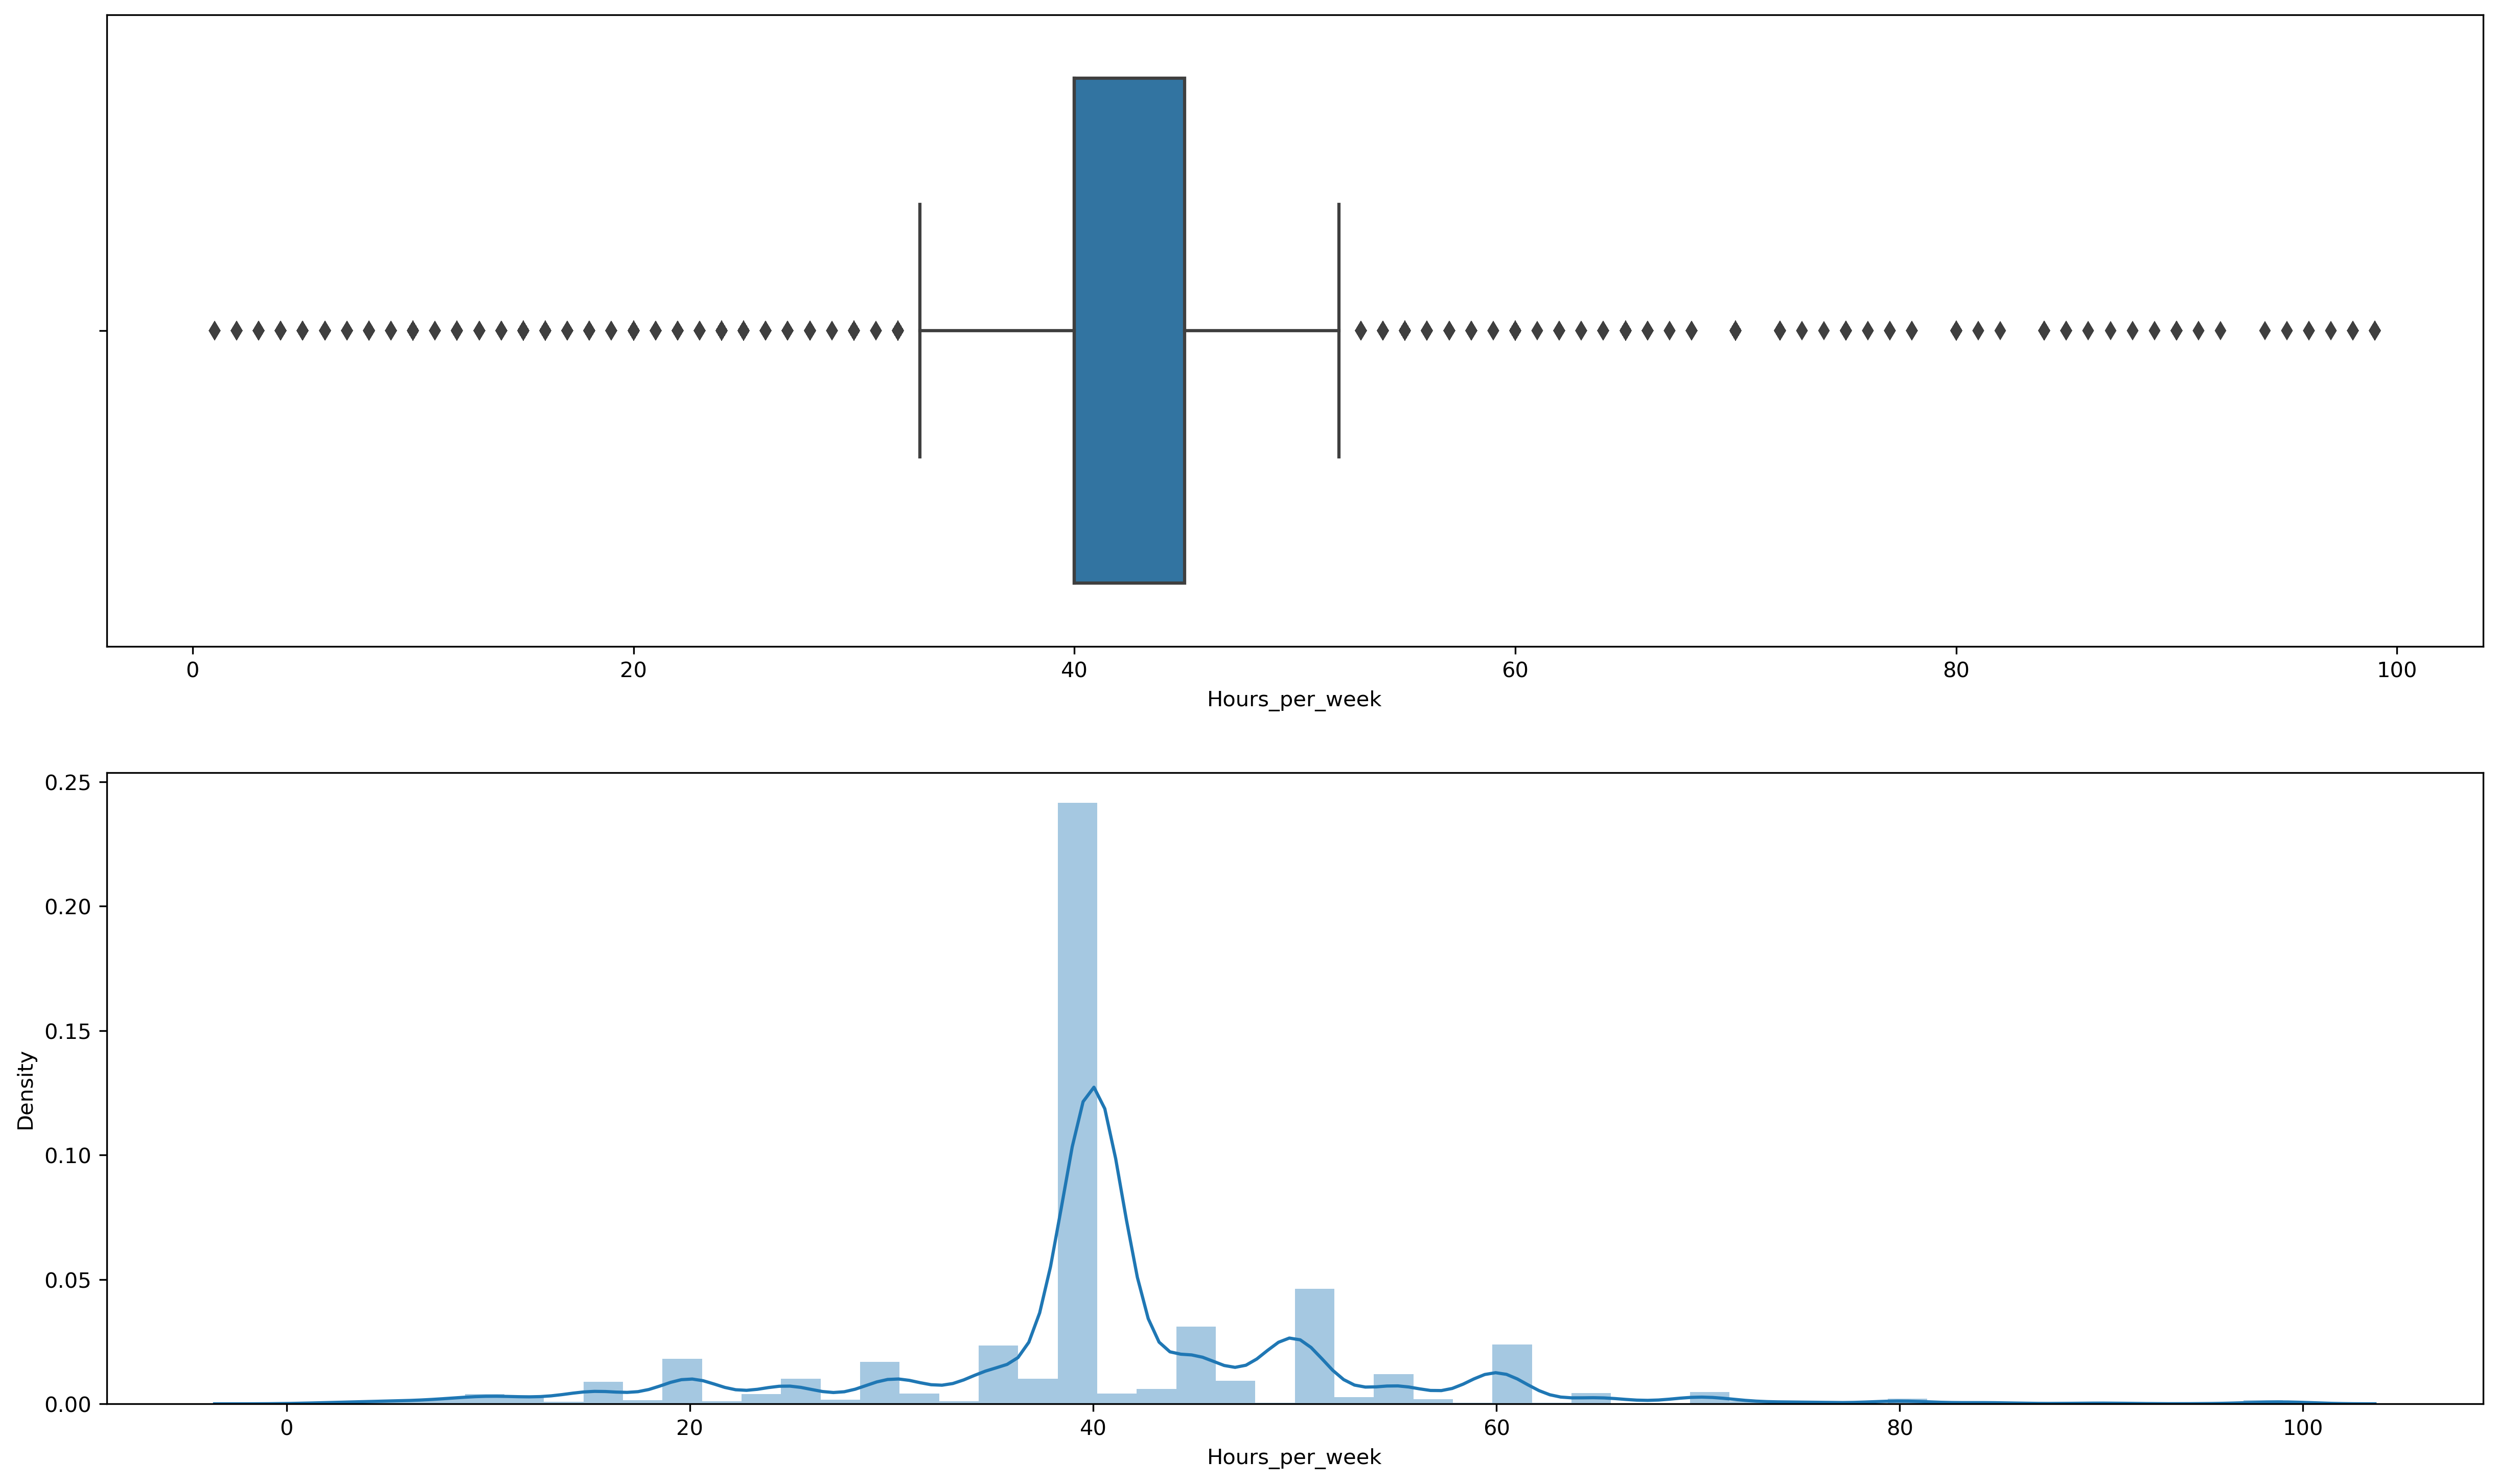

In [45]:
plt.figure(figsize=(20,12),dpi=300)
plt.subplot(2,1,1)
sns.boxplot(data['Hours_per_week']);
plt.subplot(2,1,2)
sns.distplot(data['Hours_per_week']);

Documentation:
    
I can see that there are many outliers on both sides of the quantiles and the distribution curve is not normal and has many peaks.

#####  Native_country:

In [46]:
plt.figure(figsize=(75,20), dpi=300)
sns.countplot(data.Native_country);

Documentation:

Here we can see that the highest count is only for "United states" and rest all the other are least in heir count.

##### Income:

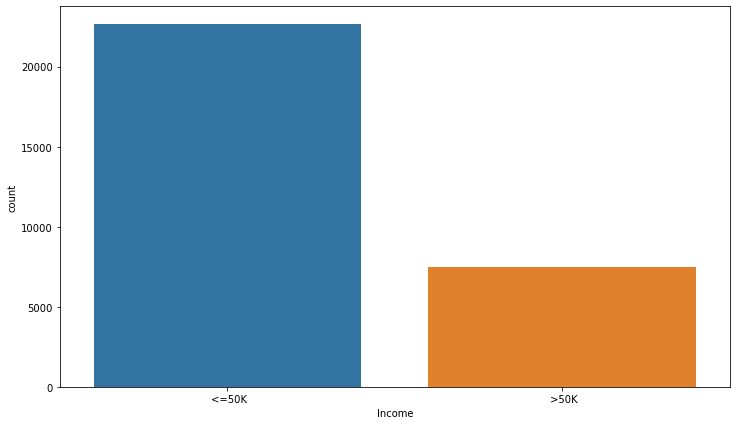

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(data.Income);

Documentation:
    
I can see that there are 2 categories which are <=50k and the other is >50k and this column is our label and by this we can understand that our model would be a "Classification model". 

### Bivariate Analysis:

##### Age:

<AxesSubplot:xlabel='Income', ylabel='Age'>

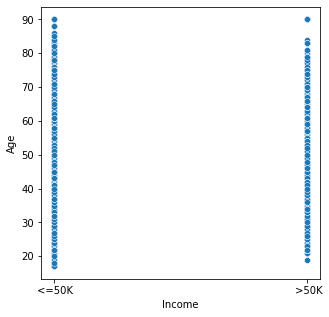

In [48]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Age', data = data )

Documentation:
    
I can see that as the "age" increases there is a increase in the "Income" and also we can see that there is high density at the age 80-90 in the income <=50k and at which the income is less at that again >50k.

##### Workclass:

<AxesSubplot:xlabel='Income', ylabel='Workclass'>

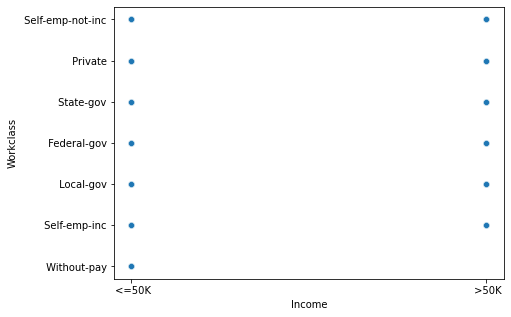

In [49]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Workclass', data = data )

Documentation:
    
I can see that as there is change in "Workclass" categories there is change in the "income" in both of the categories <=50k and >50k and also it is understood that there is no income in the category "without pay" in the income >50k.

##### Fnlwgt

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

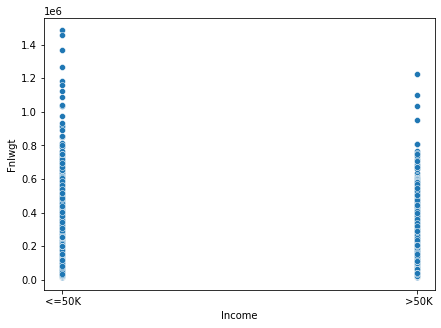

In [50]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Fnlwgt', data = data )

Documentation:
    
I can see that as there is increase in the 'fnlwgt' then, there is increase in the category <=50k in income but the category 50k has no density at the 'fnlwgt' between '0.8 - 1.4' .

##### Education:

<AxesSubplot:xlabel='Income', ylabel='Education'>

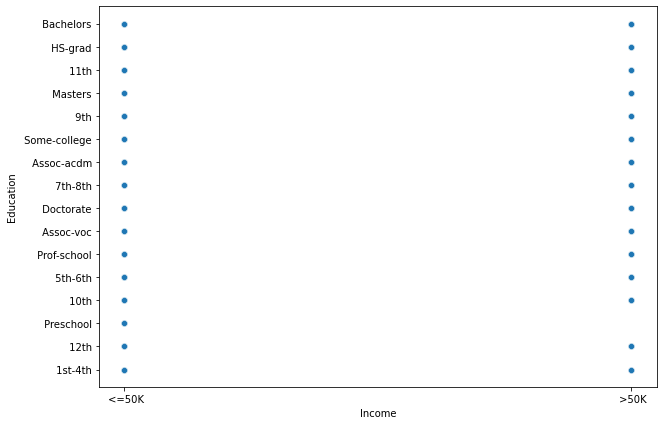

In [51]:
plot = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'Income', y = 'Education', data = data )

Documentation:
    
As the "Education" increases then we can see that there is change in different categories and "income" also increases.

##### Education_num :

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

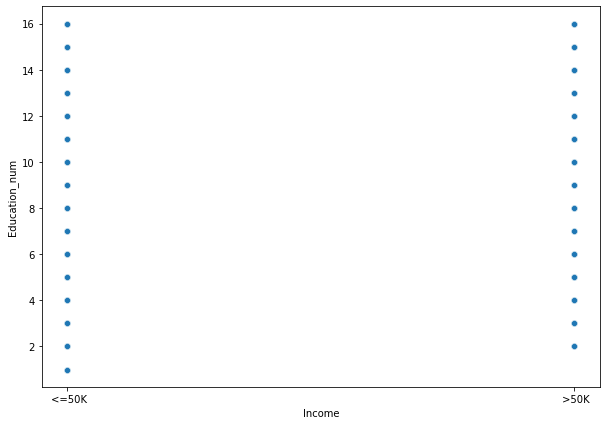

In [52]:
plot = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'Income', y = 'Education_num', data =data )

Documentation:
    
I can see that there is change or increase in the category in "Educational_num" then there is individual difference in the <=50k, >50k.

##### Marital_status :

<AxesSubplot:xlabel='Income', ylabel='Marital_status'>

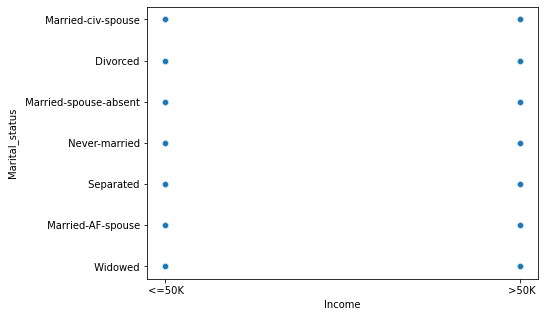

In [53]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Marital_status', data = data )

Documentation:
    
I can see that the categories are with different 

##### Occupation :

<AxesSubplot:xlabel='Income', ylabel='Occupation'>

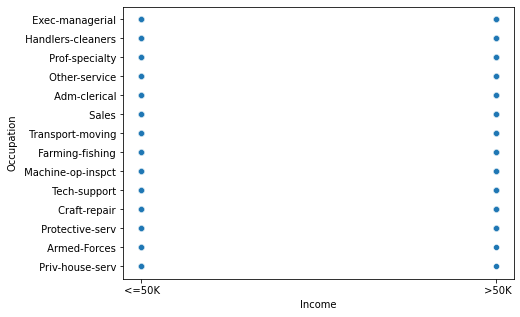

In [54]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Occupation', data = data )

Documentation:
    


##### Relationship :

<AxesSubplot:xlabel='Income', ylabel='Relationship'>

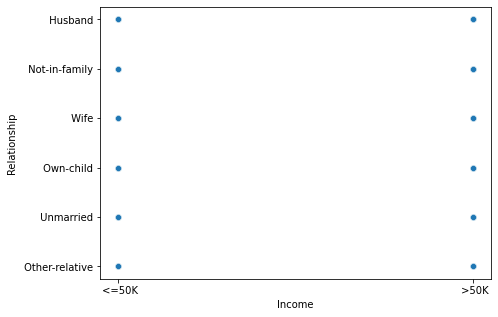

In [55]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Relationship', data=data )

Documentation:
    


##### Race :

<AxesSubplot:xlabel='Income', ylabel='Race'>

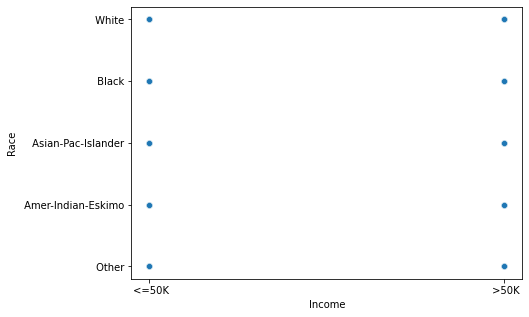

In [56]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Race', data=data )

Documentation:
    


##### Sex : 

<AxesSubplot:xlabel='Income', ylabel='Sex'>

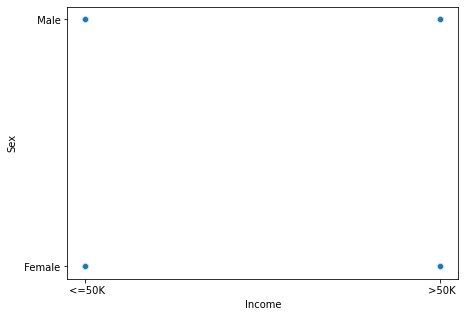

In [57]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Sex', data=data )

Documentation:



##### Capital_gain

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

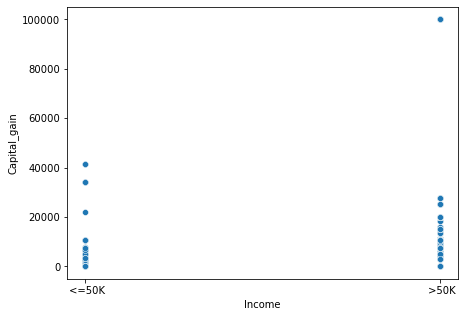

In [58]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Capital_gain', data =data )

Documentation:
    


##### Capital_loss

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

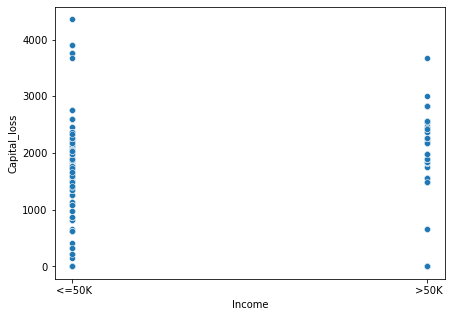

In [59]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Capital_loss', data=data )

Documentation:
    


##### Hours_per_week :

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

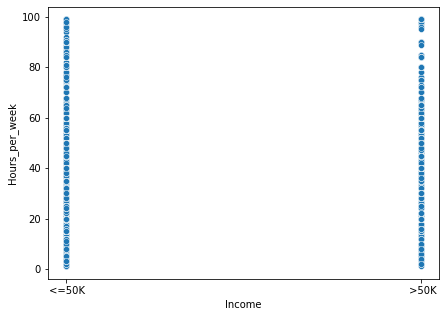

In [60]:
plot = plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Income', y = 'Hours_per_week', data=data )

Documentation:
    


##### Native_country :

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

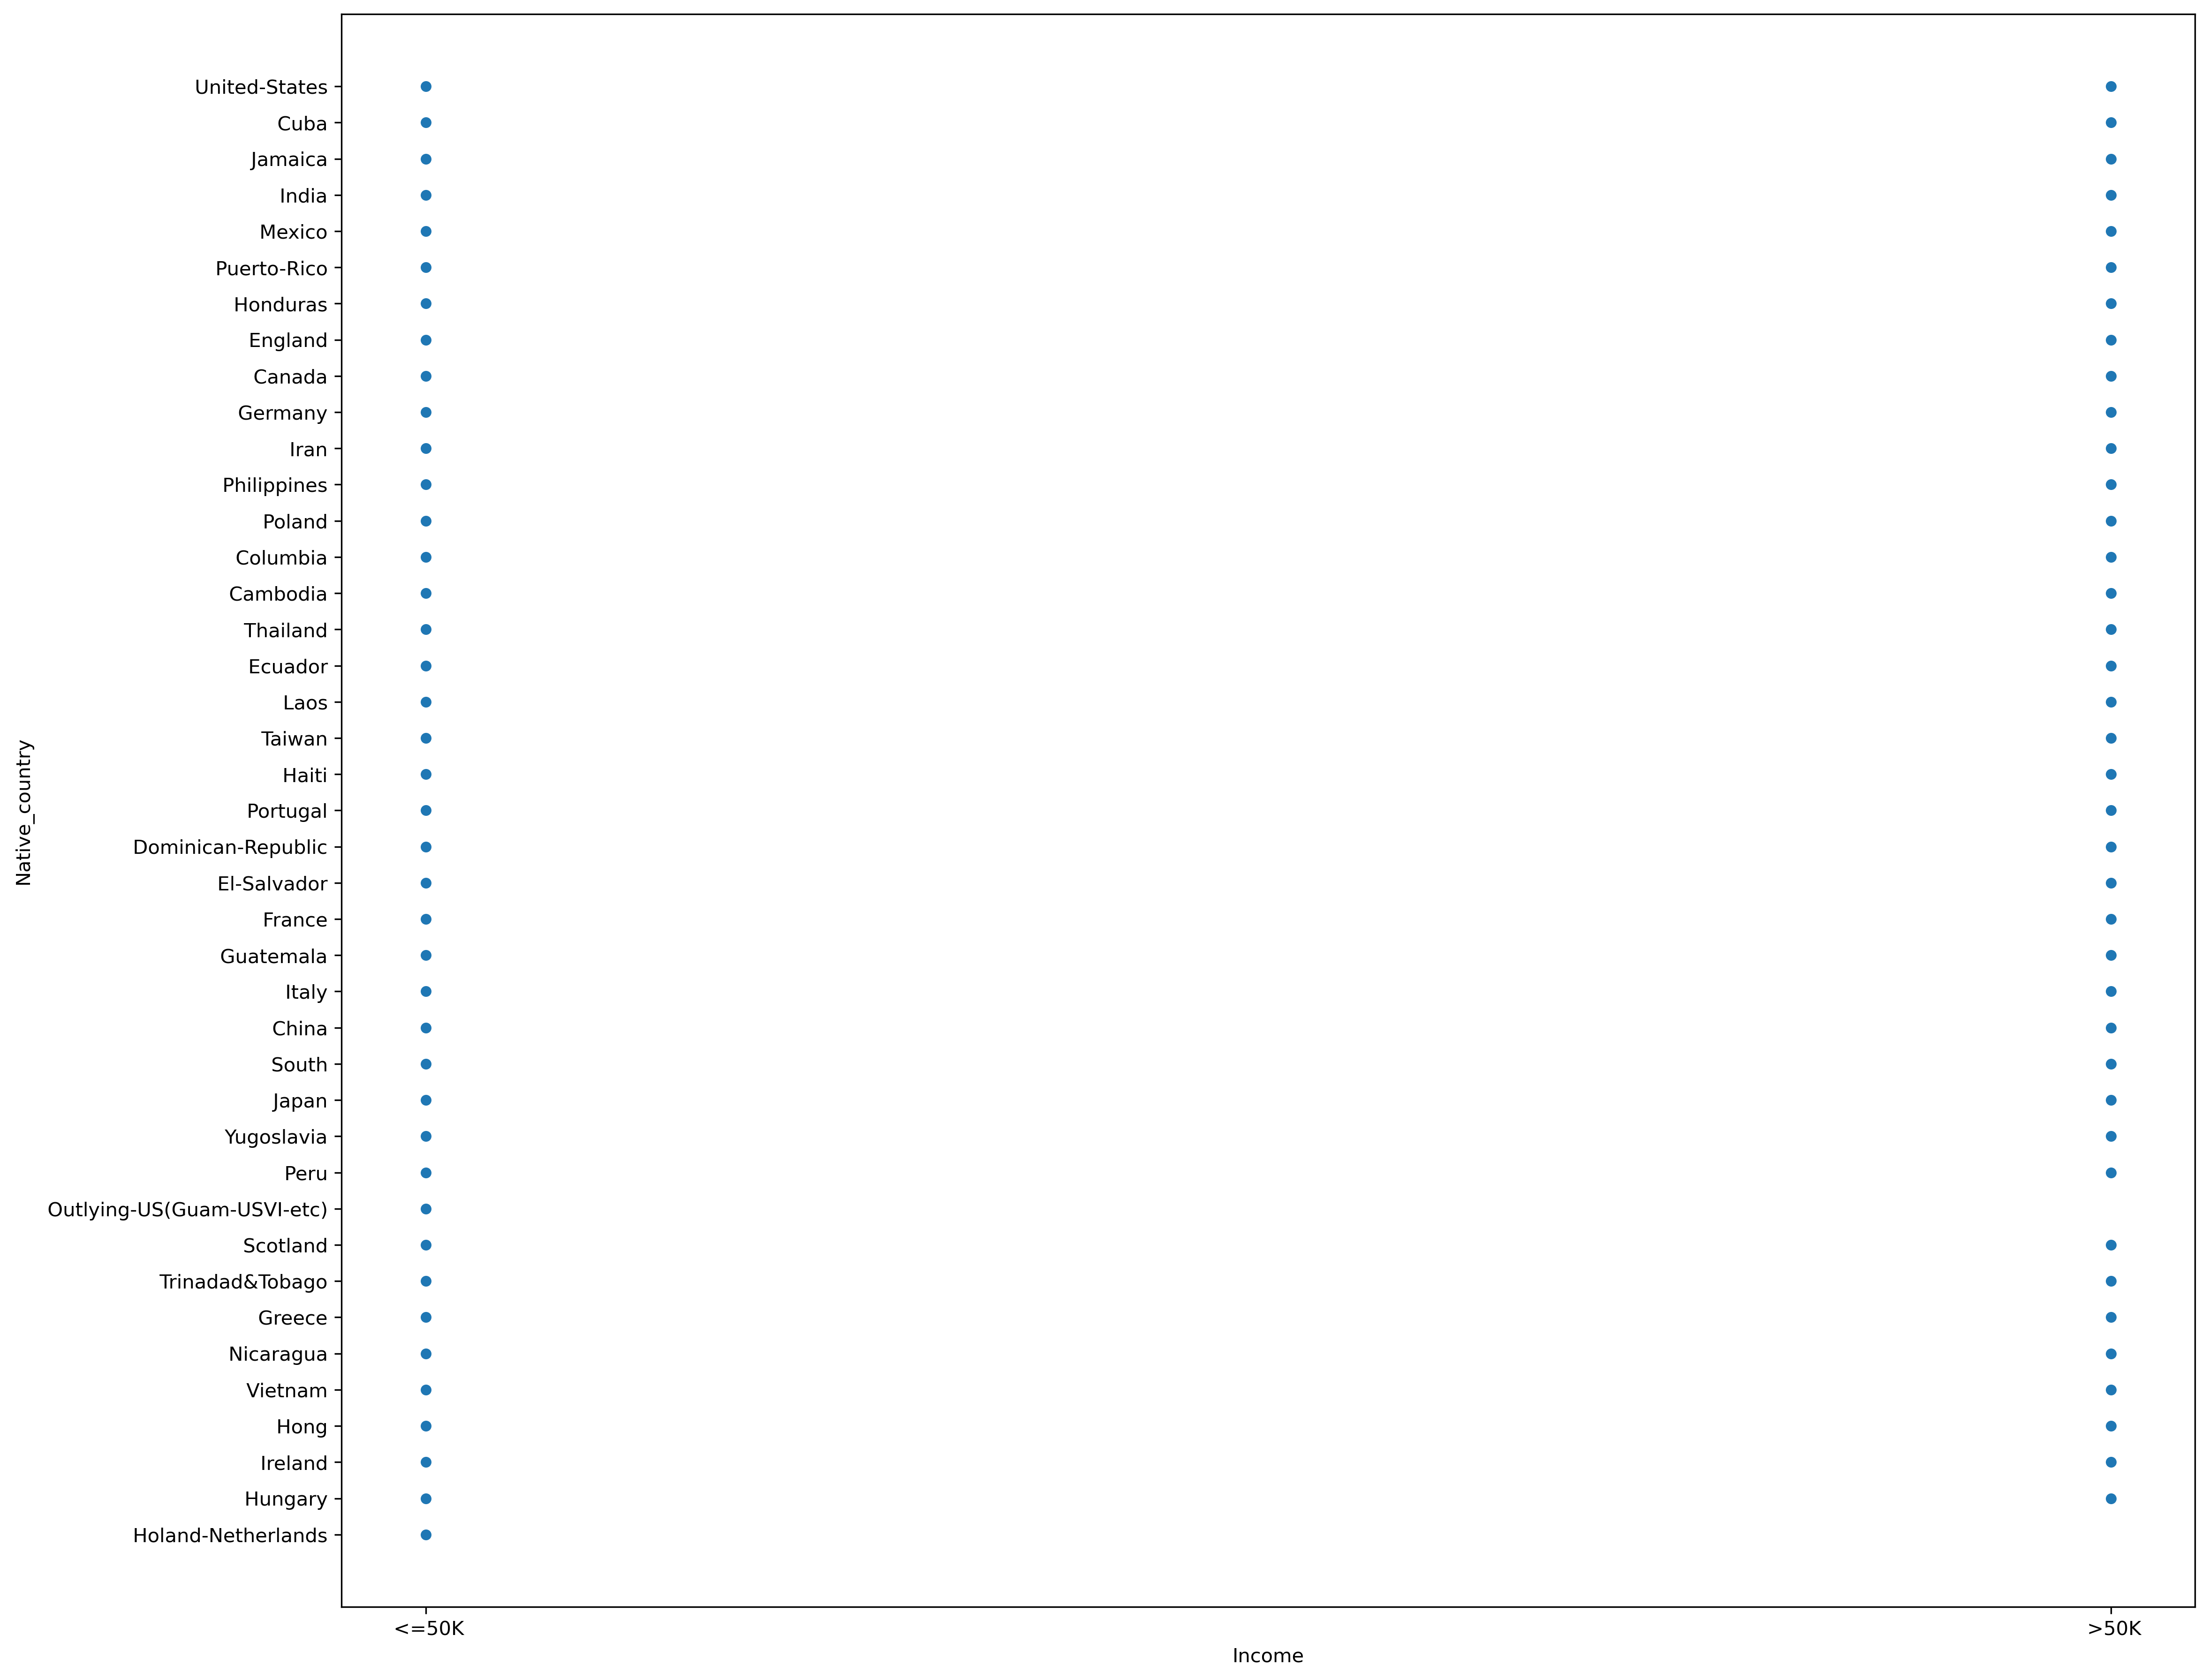

In [61]:
plot = plt.figure(figsize = (17,15),dpi=300)
sns.scatterplot(x='Income', y='Native_country', data=data )

Documentation:
    


### Multivariate Analysis:
#### Correlation:
##### Finding the correlation between the variables:

In [62]:
corr_data = data.corr()

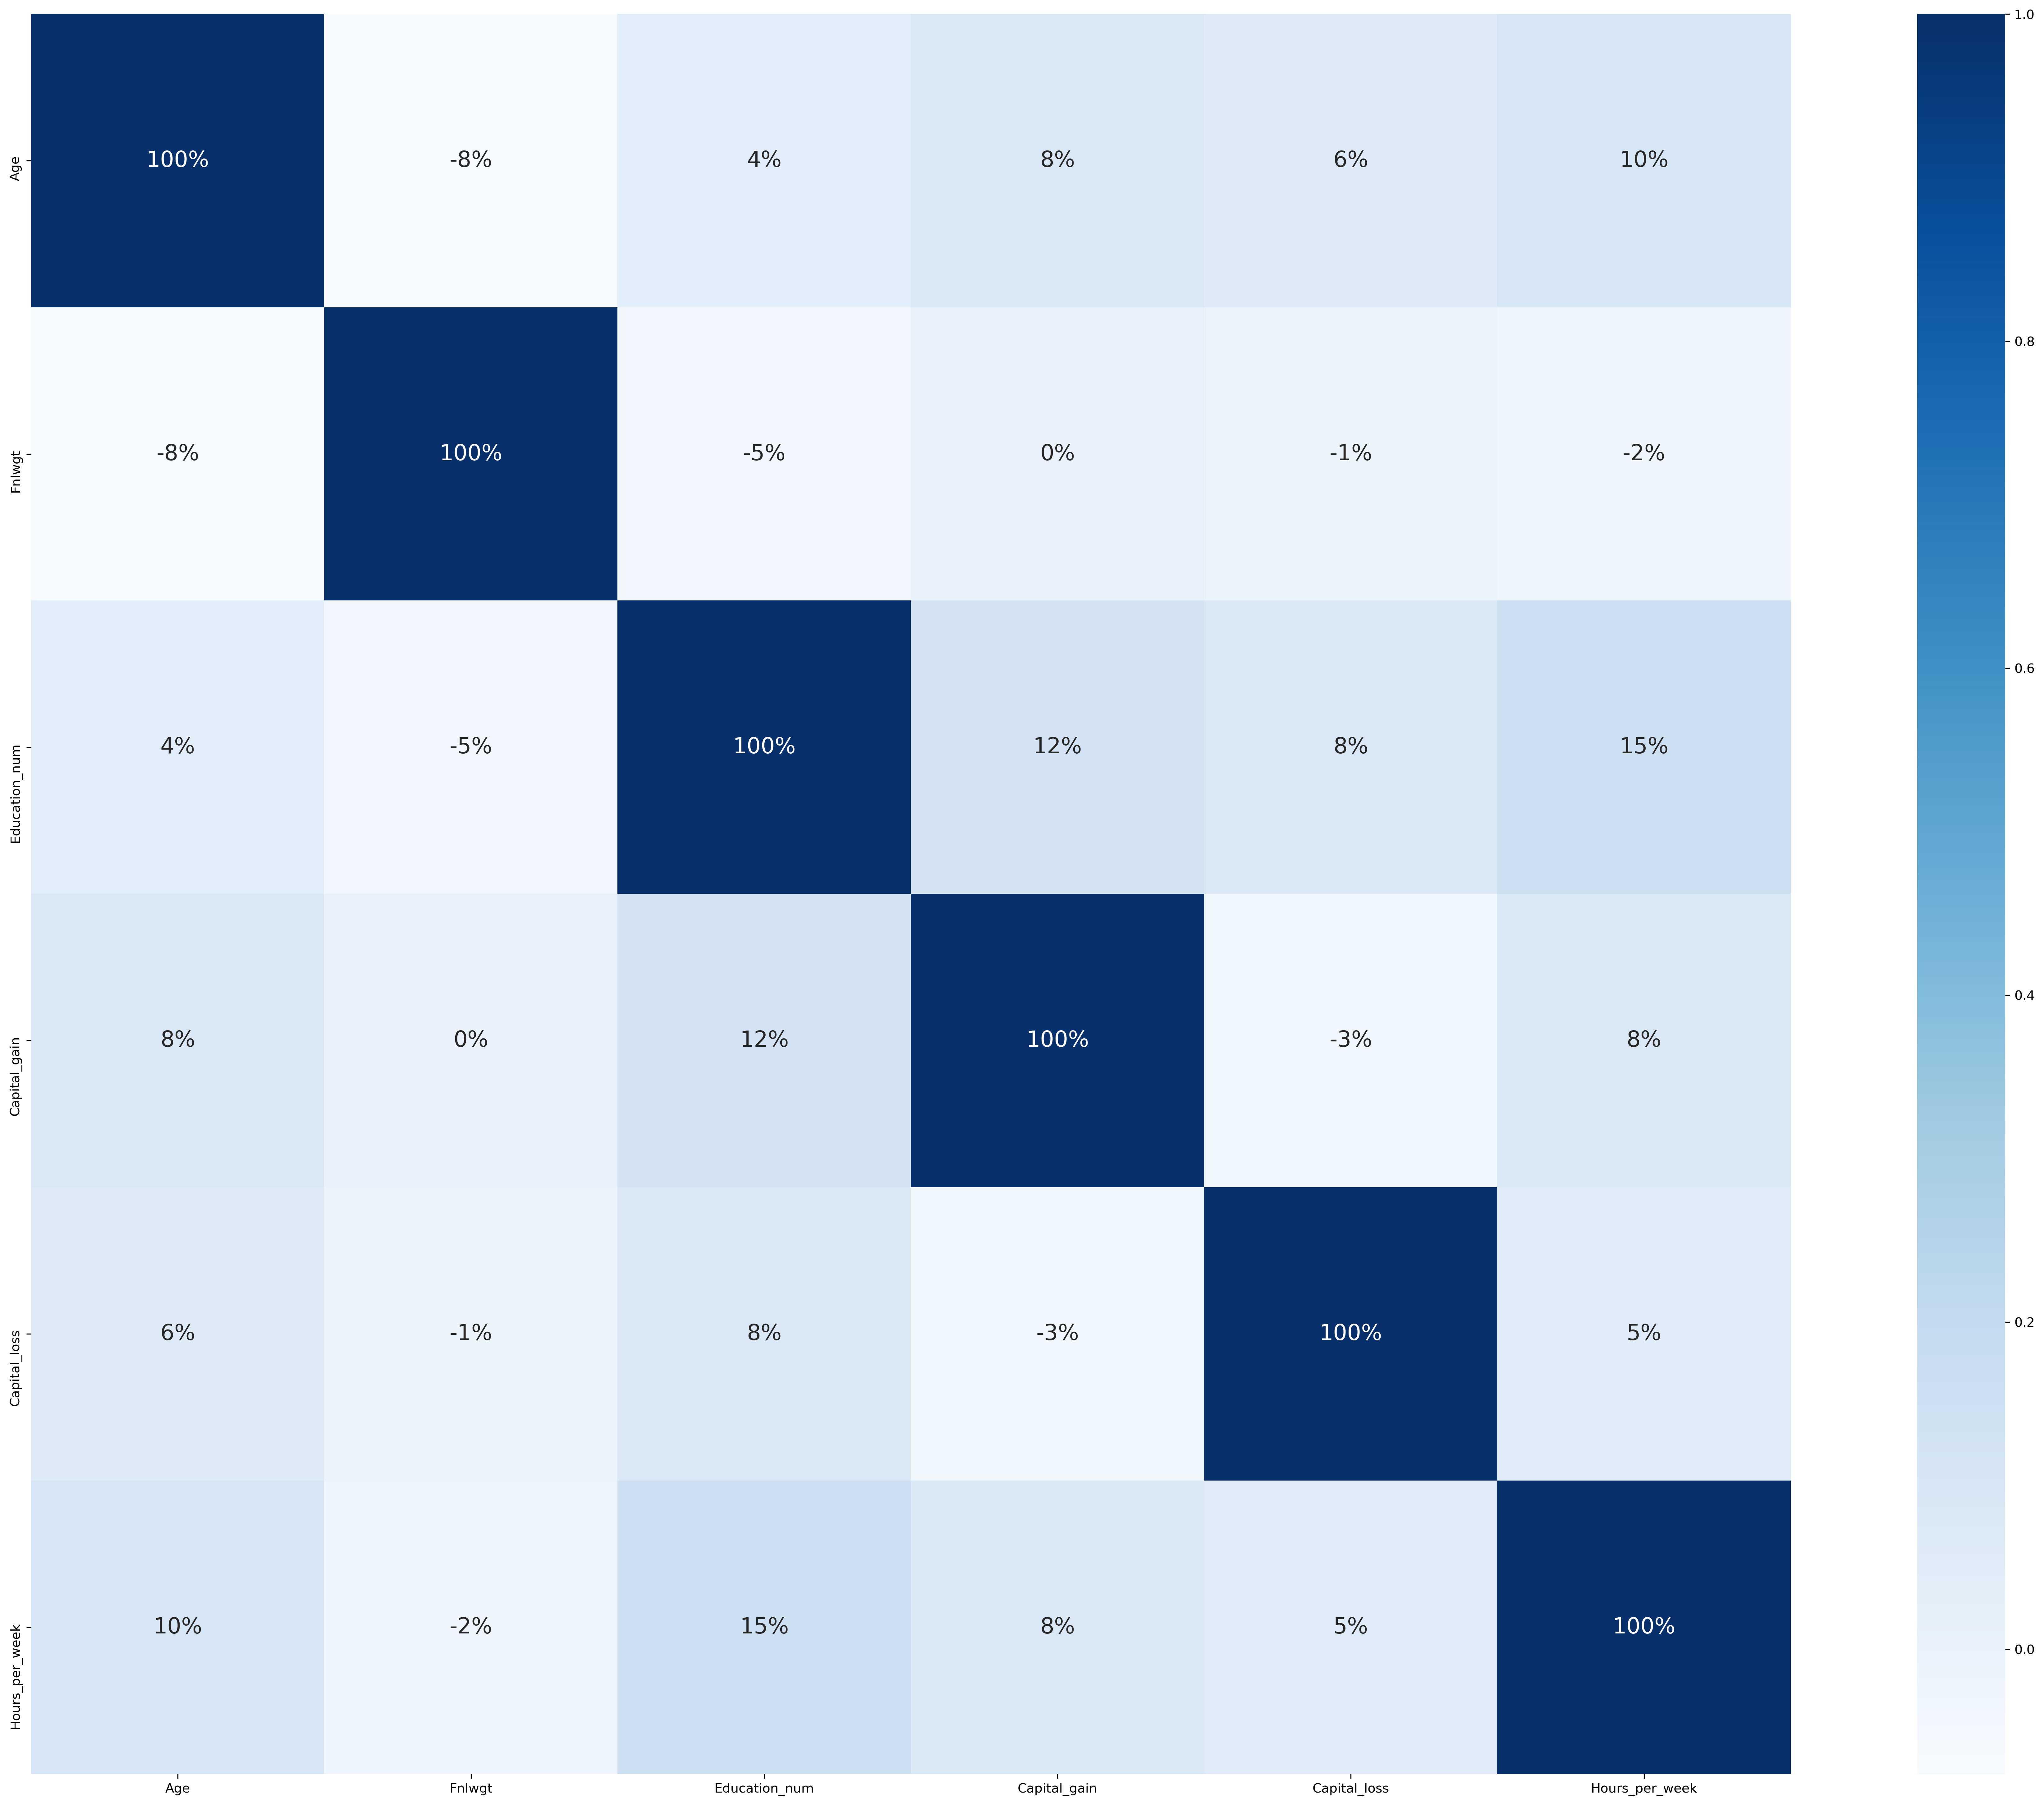

In [63]:
plt.figure(figsize =(35,25),dpi=300)
sns.heatmap(corr_data,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 17}, cmap = 'Blues')
plt.show()

Documentation:

I can see that all these columns have low correlation with label and also with each-other.

#### Finding the value_counts in our label column:

In [64]:
Income_count = pd.DataFrame(data["Income"].value_counts())

In [65]:
Income_count

,Income
<=50K,22632
>50K,7506


### Transforming the data:

#### Transforming the non-numerical columns into numerical:

In [66]:
from sklearn.preprocessing import LabelEncoder

I have used "forloop", for all the data in the dataset, the data who already have numerical data have been ignored and all the data where I'm having non-numerical data will be converted to the numerical data.

In [67]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
data    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,4,2726,9,12,2,3,0,4,1,0,0,12,38,0
1,21,2,13187,11,8,0,5,1,4,1,0,0,39,38,0
2,36,2,14353,1,6,2,5,0,2,1,0,0,39,38,0
3,11,2,18119,9,12,2,9,5,2,0,0,0,39,4,0
4,20,2,16566,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,2,15470,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,2,7554,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,2,7376,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,2,12059,11,8,4,0,3,4,1,0,0,19,38,0


### Checking the Outliers:

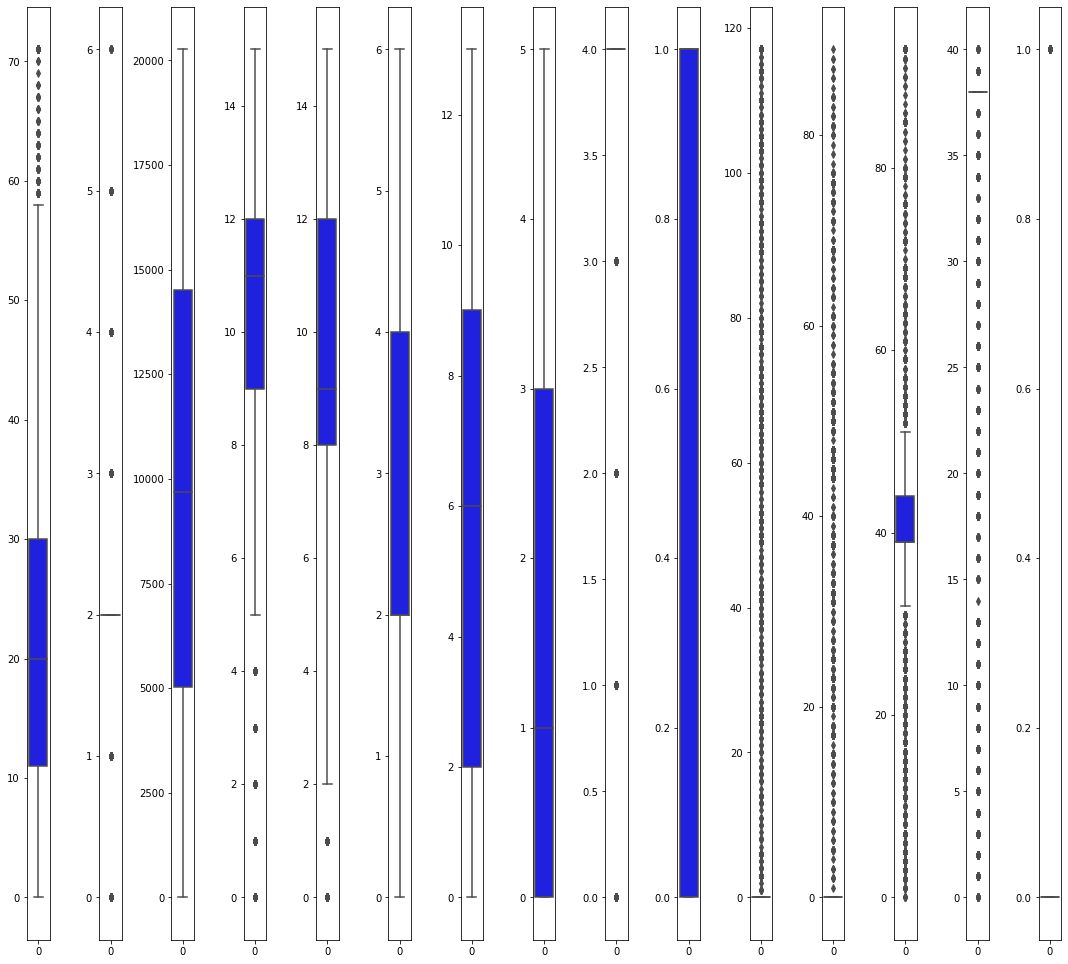

In [68]:
col_list =data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[col_list[i]],color = 'blue', orient = 'v')
    plt.tight_layout()

Documentation:
    
I can see that there are few columns who have a lot of outliers and mostly the columns "Native_country","Hours_per_week", "Capital_loss", "Capital_gain" and the column "Hours_per_week" has outliers on both sides.

### Treating the Outliers:

In [69]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z.shape

(30138, 15)

In [70]:
threshold = 3
print(np.where(z>3))

(array([    3,     7,     8, ..., 30128, 30130, 30137], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [71]:
data_new = data[(z<3).all(axis = 1)]
print(data.shape)
print(data_new.shape)

(30138, 15)
(25095, 15)


Documentation:
    
Here we can see that the number of records reduced which indicates that we have succeeded in the reduction of the outliers and thus we can proceed with our model.

### Loss percentage calculation :

In [72]:
loss_percent = (30138-25095)/30138*100
print(loss_percent)

16.733028070873978


### Checking the Skewness:

In [73]:
data_new.skew()

Age               0.470686
Workclass         1.209196
Fnlwgt            0.043663
Education        -0.964003
Education_num    -0.140265
Marital_status   -0.077640
Occupation        0.126800
Relationship      0.751909
Race             -2.574446
Sex              -0.688212
Capital_gain      5.829795
Capital_loss      9.788317
Hours_per_week   -0.284461
Native_country   -5.212713
Income            1.520476
dtype: float64

Documentation:
    
I can see all the columns who have skewness either it has negative skewness or it has positive skewness and  the lowest skewness is for the column "Native_country" and the highest is for the column "Capital_loss".

### Removing the skewness:

In [74]:
features = ["Native_country","Capital_loss","Capital_gain","Workclass","Race"]

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [76]:
data_new[features] = scaler.fit_transform(data_new[features].values)
data_new[features]

,Native_country,Capital_loss,Capital_gain,Workclass,Race
0,0.165979,-0.115789,-0.196724,1.799395,0.348802
1,0.165979,-0.115789,-0.196724,-0.118525,0.348802
2,0.165979,-0.115789,-0.196724,-0.118525,-2.870006
4,0.165979,-0.115789,-0.196724,-0.118525,0.348802
5,-4.325867,-0.115789,-0.196724,-0.118525,-2.870006
...,...,...,...,...,...
32554,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32555,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32556,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32557,0.165979,-0.115789,-0.196724,-0.118525,0.348802


In [77]:
data_new.skew()

Age               0.470686
Workclass         0.123680
Fnlwgt            0.043663
Education        -0.964003
Education_num    -0.140265
Marital_status   -0.077640
Occupation        0.126800
Relationship      0.751909
Race             -2.518358
Sex              -0.688212
Capital_gain      4.886834
Capital_loss      8.521117
Hours_per_week   -0.284461
Native_country    1.404296
Income            1.520476
dtype: float64

Documentation:
    
I can see that there is change or we can say that there is reduction in the skewness of the data.

### Data Preprocessing:

#### Separating independent and the target variables:

##### train_test_split:

In [78]:
X = data_new.drop("Income", axis=1)
y = data_new["Income"]

In [79]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,1.799395,2726,9,12,2,3,0,0.348802,1,-0.196724,-0.115789,12,0.165979
1,21,-0.118525,13187,11,8,0,5,1,0.348802,1,-0.196724,-0.115789,39,0.165979
2,36,-0.118525,14353,1,6,2,5,0,-2.870006,1,-0.196724,-0.115789,39,0.165979
4,20,-0.118525,16566,12,13,2,3,5,0.348802,0,-0.196724,-0.115789,39,0.165979
5,32,-0.118525,7981,6,4,3,7,1,-2.870006,0,-0.196724,-0.115789,15,-4.325867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,-0.118525,17374,15,9,4,10,1,0.348802,1,-0.196724,-0.115789,39,0.165979
32555,10,-0.118525,15470,7,11,2,12,5,0.348802,0,-0.196724,-0.115789,37,0.165979
32556,23,-0.118525,7554,11,8,2,6,0,0.348802,1,-0.196724,-0.115789,39,0.165979
32557,41,-0.118525,7376,11,8,6,0,4,0.348802,0,-0.196724,-0.115789,39,0.165979


In [80]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 25095, dtype: int32

### Scaling the x_data using standardscaler:

In [81]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.961058,1.799395,-1.267433,-0.350314,1.254196,-0.394840,-0.718858,-0.920370,0.348802,0.713456,-0.196724,-0.115789,-2.546462,0.165979
1,0.026590,-0.118525,0.579736,0.168459,-0.432132,-1.703931,-0.225902,-0.292657,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
2,1.194675,-0.118525,0.785624,-2.425408,-1.275296,-0.394840,-0.225902,-0.920370,-2.870006,0.713456,-0.196724,-0.115789,-0.022599,0.165979
3,-0.051282,-0.118525,1.176388,0.427846,1.675778,-0.394840,-0.718858,2.218194,0.348802,-1.401628,-0.196724,-0.115789,-0.022599,0.165979
4,0.883186,-0.118525,-0.339523,-1.128474,-2.118460,0.259706,0.267055,-0.292657,-2.870006,-1.401628,-0.196724,-0.115789,-2.266033,-4.325867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25090,-1.219367,-0.118525,1.319062,1.206006,-0.010550,0.914251,1.006490,-0.292657,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
25091,-0.830005,-0.118525,0.982860,-0.869088,0.832614,-0.394840,1.499446,2.218194,0.348802,-1.401628,-0.196724,-0.115789,-0.209552,0.165979
25092,0.182335,-0.118525,-0.414921,0.168459,-0.432132,-0.394840,0.020577,-0.920370,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
25093,1.584037,-0.118525,-0.446351,0.168459,-0.432132,2.223342,-1.458293,1.590481,0.348802,-1.401628,-0.196724,-0.115789,-0.022599,0.165979


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

### Training:

In [83]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


### Testing:

In [84]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(X_test,y_test)*100))

LogisticRegression: 82.30%
K-Nearest Neighbors: 82.51%
Decision Tree: 79.41%
Random Forest: 83.70%
Gradient Boosting: 84.37%


### Hyper Parameter Tuning:

#### Grid Search CV:

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

### Gradient Boosting Classifier:

I have use "GradientBoostingClassifier" because this model has highest accuracy score when compared to the other models.

In [87]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [88]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

GradientBoosting = GradientBoostingClassifier()
Classifier = GridSearchCV(GradientBoosting,parameters)
Classifier.fit(X_train,y_train)

print(Classifier.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


Documentation:
    
I can see that the best_parameteers are selected.

In [90]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'auto')
GradientBoosting.fit(X_train,y_train)
GradientBoosting.score(X_train,y_train)

pred_decision = GradientBoosting.predict(X_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,X,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 0.710773136793319
Cross Val Score: 85.21219366407651


# Saving the model:

In [91]:
import pickle
filename = 'churn.pkl'
pickle.dump(GradientBoosting,open(filename, 'wb'))

In [92]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(X_test, y_test)
print(result)

0.8436711382653739


# Conclusion:

In [93]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [94]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528
Predicted,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0


So, therefore our best model is "GradientBoosting" and the percentage we achieved is 84% .